### Module Import

In [32]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
import numpy as np
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import plot_precision_recall_curve, precision_recall_curve,roc_auc_score
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import matthews_corrcoef
import time
from xgboost import XGBClassifier


### Loading Dataset

In [2]:
df = pd.read_csv('insurance_claims.csv')

In [3]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


### Data Preprocessing

In [4]:
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [4]:
## Dropping _c39 as it has maximum nulls and of no use for our analysis

In [3]:
df.drop('_c39',axis='columns', inplace=True)

In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
months_as_customer,1000.0,2.039540e+02,1.151132e+02,0.00,115.7500,199.5,276.250,479.00
age,1000.0,3.894800e+01,9.140287e+00,19.00,32.0000,38.0,44.000,64.00
policy_number,1000.0,5.462386e+05,2.570630e+05,100804.00,335980.2500,533135.0,759099.750,999435.00
policy_deductable,1000.0,1.136000e+03,6.118647e+02,500.00,500.0000,1000.0,2000.000,2000.00
policy_annual_premium,1000.0,1.256406e+03,2.441674e+02,433.33,1089.6075,1257.2,1415.695,2047.59
umbrella_limit,1000.0,1.101000e+06,2.297407e+06,-1000000.00,0.0000,0.0,0.000,10000000.00
insured_zip,1000.0,5.012145e+05,7.170161e+04,430104.00,448404.5000,466445.5,603251.000,620962.00
capital-gains,1000.0,2.512610e+04,2.787219e+04,0.00,0.0000,0.0,51025.000,100500.00
capital-loss,1000.0,-2.679370e+04,2.810410e+04,-111100.00,-51500.0000,-23250.0,0.000,0.00
incident_hour_of_the_day,1000.0,1.164400e+01,6.951373e+00,0.00,6.0000,12.0,17.000,23.00


In [7]:
df.select_dtypes(include='object').describe().transpose()

,count,unique,top,freq
policy_bind_date,1000,951,1992-04-28,3
policy_state,1000,3,OH,352
policy_csl,1000,3,250/500,351
insured_sex,1000,2,FEMALE,537
insured_education_level,1000,7,JD,161
insured_occupation,1000,14,machine-op-inspct,93
insured_hobbies,1000,20,reading,64
insured_relationship,1000,6,own-child,183
incident_date,1000,60,2015-02-02,28
incident_type,1000,4,Multi-vehicle Collision,419


In [8]:
## We can convert date fields from object to date datatype 

In [4]:
df['policy_bind_date'] = pd.to_datetime(df['policy_bind_date'])
df['incident_date'] = pd.to_datetime(df['incident_date'])

In [12]:
# columns with ? entries
df.columns[(df == '?').any()]

Index(['collision_type', 'property_damage', 'police_report_available'], dtype='object')

In [13]:
df[df.columns[(df == '?').any()]].nunique()

collision_type             4
property_damage            3
police_report_available    3
dtype: int64

In [14]:
## We can replace '?' with unknown

In [5]:
df['police_report_available'] = df['police_report_available'].replace("?", "unknown")
df['collision_type'] = df['collision_type'].replace("?", "unknown")
df['property_damage'] = df['property_damage'].replace("?", "unknown")

In [16]:
### Check for outliers

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18]),
 [Text(1, 0, 'months_as_customer'),
  Text(2, 0, 'age'),
  Text(3, 0, 'policy_number'),
  Text(4, 0, 'policy_deductable'),
  Text(5, 0, 'policy_annual_premium'),
  Text(6, 0, 'umbrella_limit'),
  Text(7, 0, 'insured_zip'),
  Text(8, 0, 'capital-gains'),
  Text(9, 0, 'capital-loss'),
  Text(10, 0, 'incident_hour_of_the_day'),
  Text(11, 0, 'number_of_vehicles_involved'),
  Text(12, 0, 'bodily_injuries'),
  Text(13, 0, 'witnesses'),
  Text(14, 0, 'total_claim_amount'),
  Text(15, 0, 'injury_claim'),
  Text(16, 0, 'property_claim'),
  Text(17, 0, 'vehicle_claim'),
  Text(18, 0, 'auto_year')])

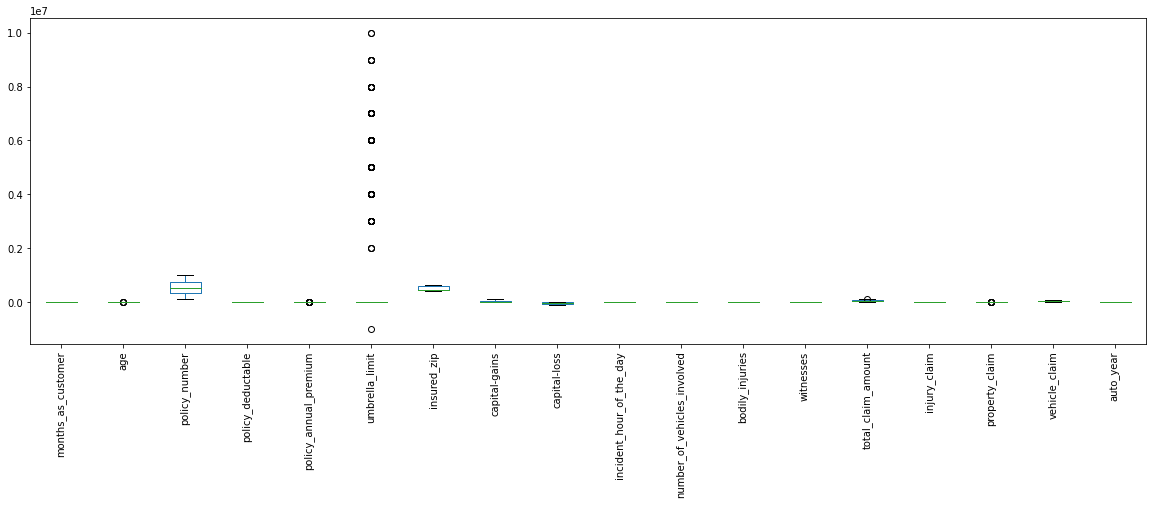

In [17]:
df.plot.box(figsize = (20,6))
plt.xticks(rotation = 90)

In [18]:
df['umbrella_limit'].sort_values(ascending=True)

290    -1000000
0             0
623           0
624           0
625           0
         ...   
657     9000000
458     9000000
975     9000000
430    10000000
115    10000000
Name: umbrella_limit, Length: 1000, dtype: int64

In [19]:
df['umbrella_limit'].sort_values(ascending=False)

115    10000000
430    10000000
975     9000000
458     9000000
657     9000000
         ...   
625           0
624           0
623           0
0             0
290    -1000000
Name: umbrella_limit, Length: 1000, dtype: int64

In [20]:
# limit can never be -ve , hence updating -ve umbrella limit to 0

In [6]:
df['umbrella_limit']=df['umbrella_limit'].replace(-1000000,0)

In [21]:
## Distribution of Target Variable

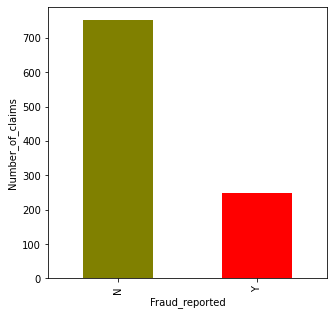

In [23]:
ax = pd.value_counts(df['fraud_reported']).plot.bar(color=['olive', 'red'], figsize=(5,5))
ax.set_xlabel('Fraud_reported')
ax.set_ylabel('Number_of_claims')
plt.show()

In [24]:
## As we can see Target variable is imbalanced , we will handle this before training

In [25]:
df['collision_type'].value_counts()

Rear Collision     292
Side Collision     276
Front Collision    254
unknown            178
Name: collision_type, dtype: int64

In [31]:
#### We need label encoding for all features which are not numeric ,Let's start with data type object

In [32]:
## check for columns of object data type

In [33]:
def object_datatype_report(df):
    feature_name =[]
    distinct_count=[]
    for col in df:
        if df[col].dtype == 'object':
            feature_name.append(str(col)) 
            distinct_count.append(df[col].nunique())

    object_type_features = pd.DataFrame()
    object_type_features['feature_name'] = feature_name
    object_type_features['distinct_count']= distinct_count
            
    object_type_features=object_type_features.sort_values('distinct_count',ascending=False)
    return object_type_features

In [34]:
object_datatype_report(df)

,feature_name,distinct_count
5,insured_hobbies,20
4,insured_occupation,14
3,insured_education_level,7
10,incident_state,7
11,incident_city,7
6,insured_relationship,6
7,incident_type,4
8,collision_type,4
9,incident_severity,4
0,policy_state,3


In [35]:
# Based on above result we can see drop columns having maximum unique values
# As this will not help in generalizing model

In [7]:
df=df.drop(['incident_location','policy_number','policy_bind_date','insured_zip','incident_date','authorities_contacted','auto_make','auto_model'],axis=1)

In [38]:
df.columns

Index(['months_as_customer', 'age', 'policy_state', 'policy_csl',
       'policy_deductable', 'policy_annual_premium', 'umbrella_limit',
       'insured_sex', 'insured_education_level', 'insured_occupation',
       'insured_hobbies', 'insured_relationship', 'capital-gains',
       'capital-loss', 'incident_type', 'collision_type', 'incident_severity',
       'incident_state', 'incident_city', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_year',
       'fraud_reported'],
      dtype='object')

In [39]:
df.head()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,...,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,fraud_reported
0,328,48,OH,250/500,1000,1406.91,0,MALE,MD,craft-repair,...,YES,1,2,YES,71610,6510,13020,52080,2004,Y
1,228,42,IN,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,...,unknown,0,0,unknown,5070,780,780,3510,2007,Y
2,134,29,OH,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,...,NO,2,3,NO,34650,7700,3850,23100,2007,N
3,256,41,IL,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,...,unknown,1,2,NO,63400,6340,6340,50720,2014,Y
4,228,44,IL,500/1000,1000,1583.91,6000000,MALE,Associate,sales,...,NO,0,1,NO,6500,1300,650,4550,2009,N


In [40]:
## Now we can apply label encoding for remaining columns

In [8]:
df=pd.get_dummies(df,columns=['policy_state','policy_csl','insured_sex','insured_education_level','insured_occupation',
                                'insured_hobbies','insured_relationship','incident_type','collision_type','incident_severity','incident_state',
                                'incident_city','property_damage','police_report_available'],drop_first=True)

In [11]:
df.shape

(1000, 90)

In [43]:
## We can encode target_variable as well

In [9]:
df["fraud_reported"]= df["fraud_reported"].map({"N":0, "Y":1})

In [10]:
X=df.drop(['fraud_reported'],axis='columns')


In [11]:
y=df['fraud_reported']

In [49]:
### Scaling Featires Value to Follow Standard normal Distribution

In [12]:
scaling_obj=StandardScaler()
X_scal = scaling_obj.fit_transform(X)

### Exploratory Data Analysis

In [42]:
#distribution of ordinal and continuous variables

#all variables
all_var = list(df.columns)

#continuous variables = ordinal, interval, ratio
cont_var =['age','incident_hour_of_the_day',
           'number_of_vehicles_involved','total_claim_amount',
           'injury_claim','property_claim','vehicle_claim',
           'months_as_customer','policy_annual_premium','policy_deductable',
           'umbrella_limit','capital-gains','capital-loss', 
           'auto_year','witnesses','bodily_injuries']

#ordinal variables
ord_var = ['policy_deductable','witnesses','bodily_injuries']

#quan var = interval or ratio 
quan_var = (list(set(cont_var) - set(ord_var))) 

#norminal aka discrete var
nom_var = (list(set(all_var) - set(cont_var))) 

c:\users\sbalani\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.


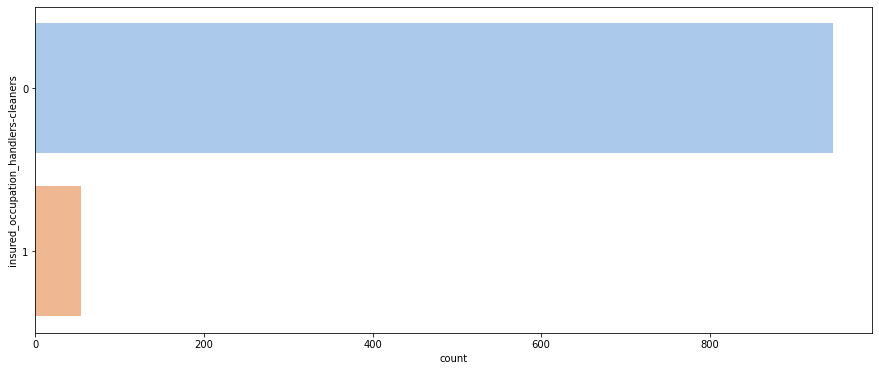

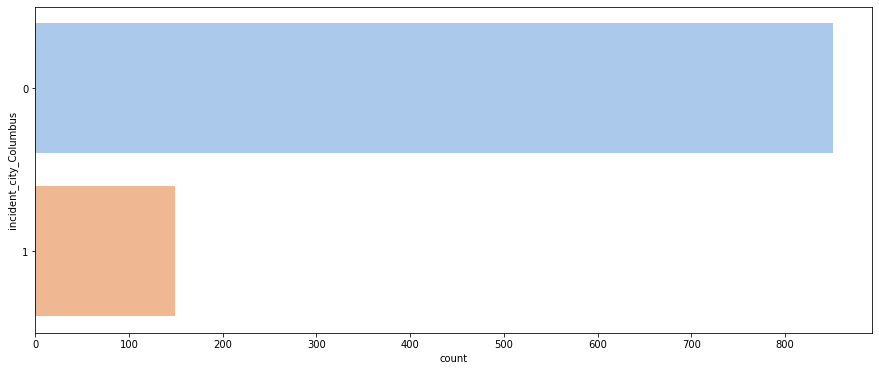

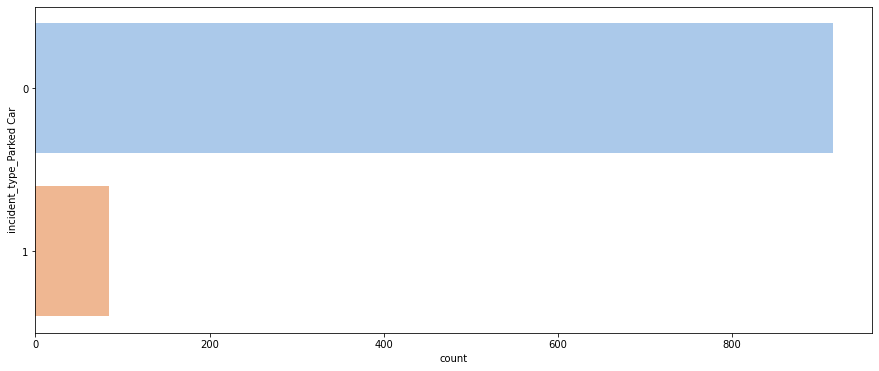

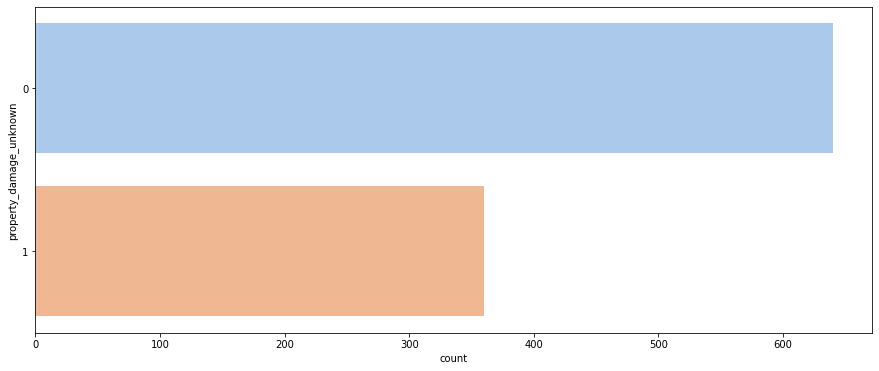

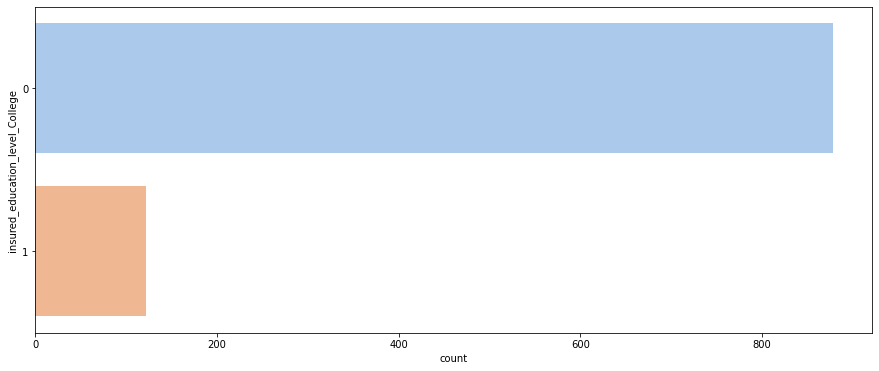

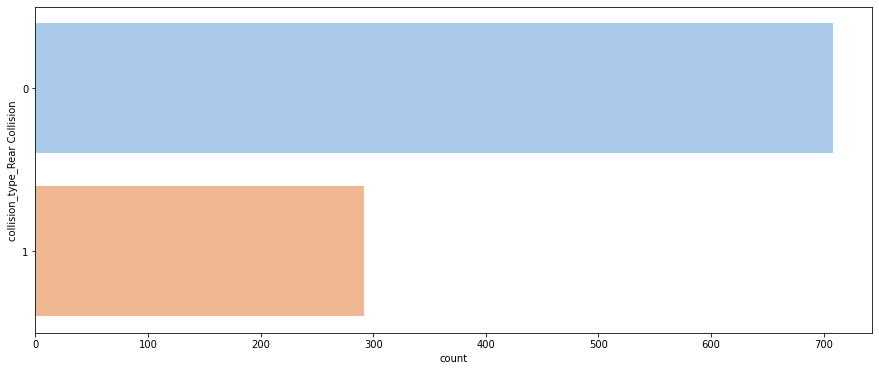

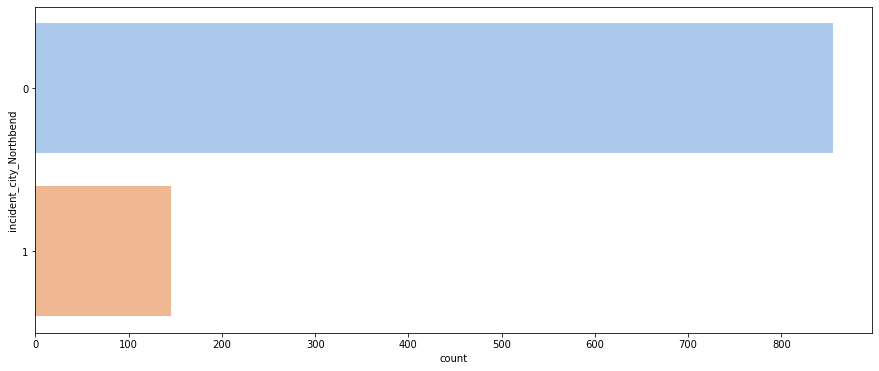

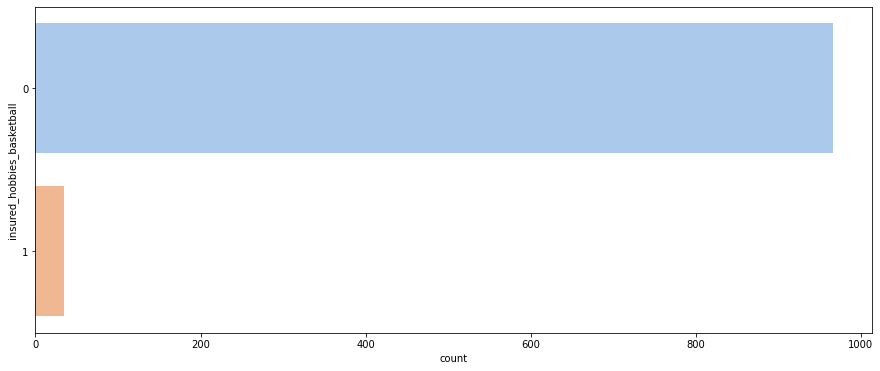

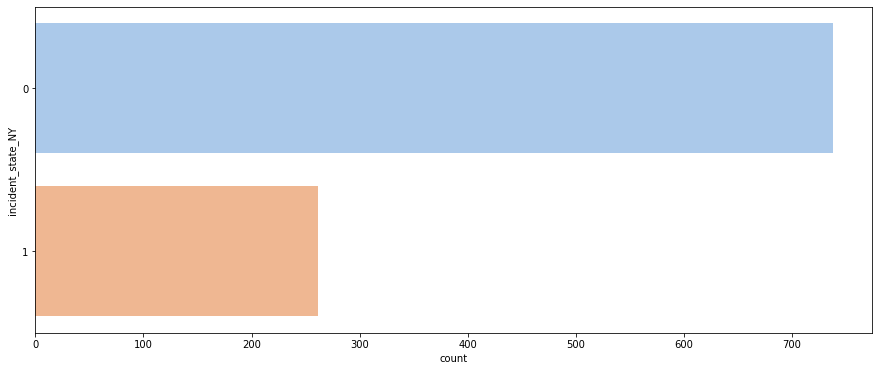

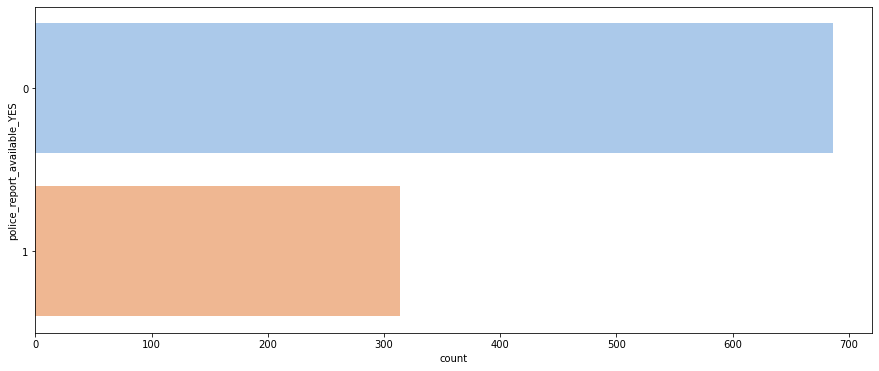

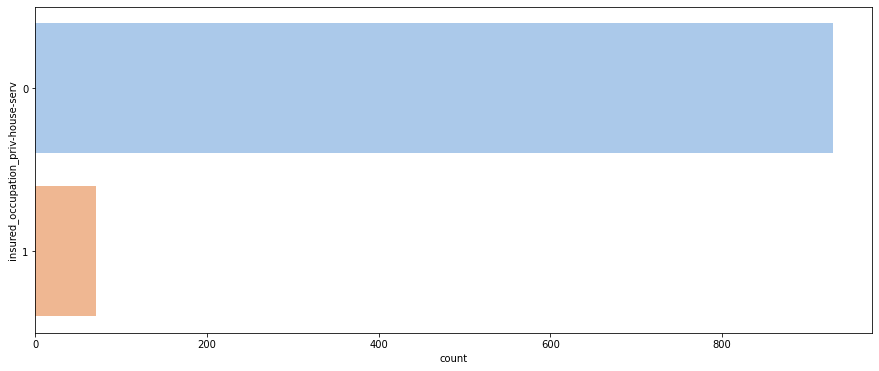

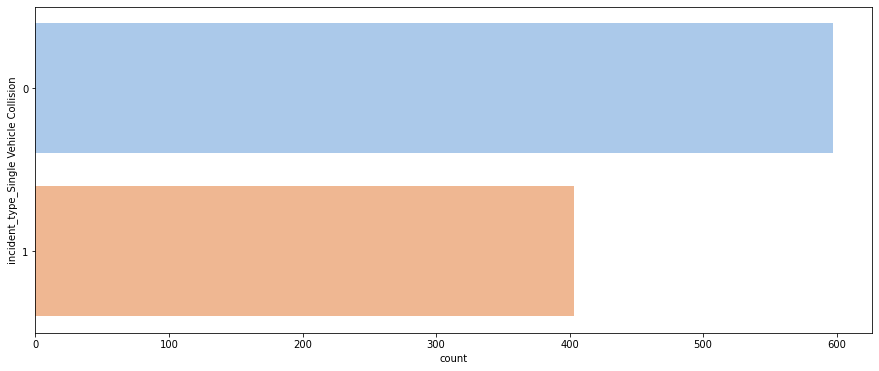

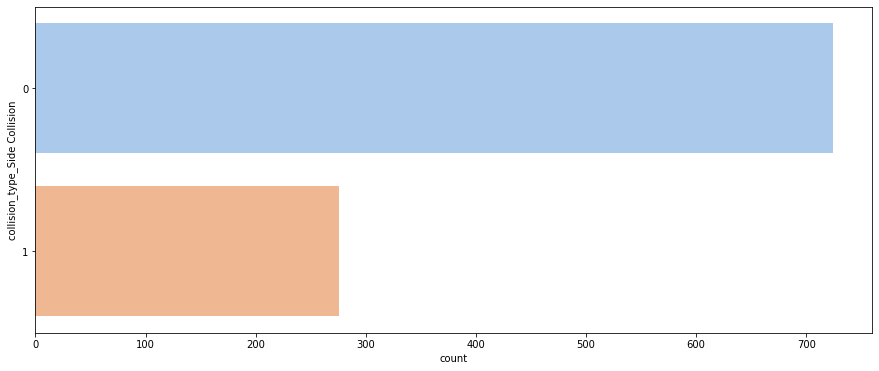

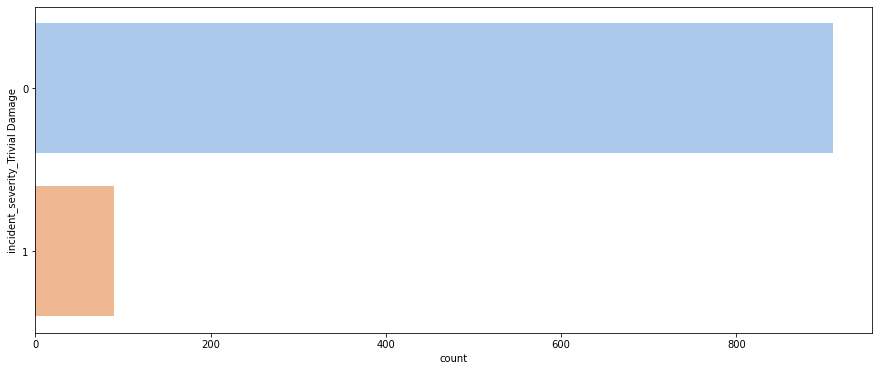

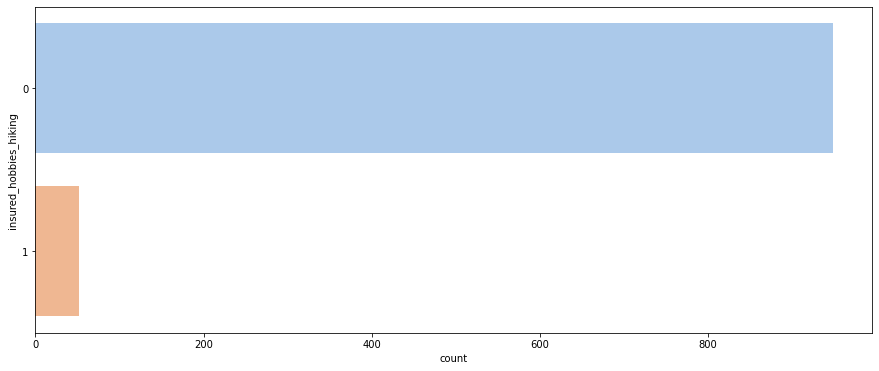

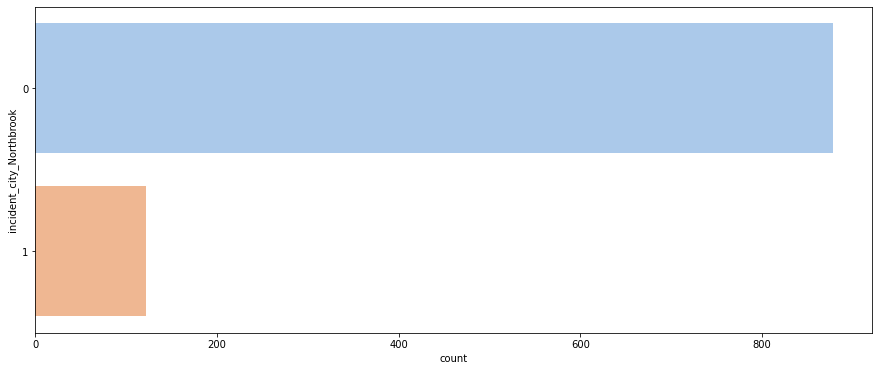

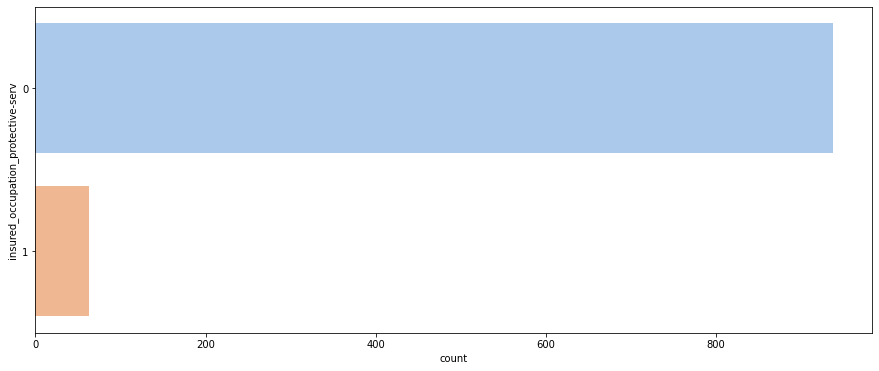

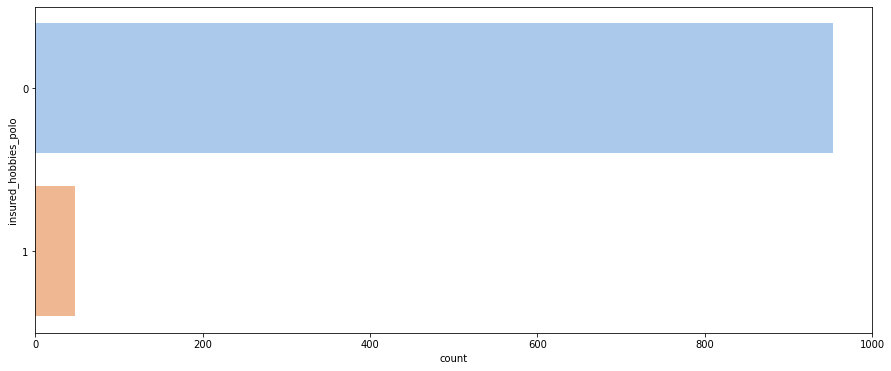

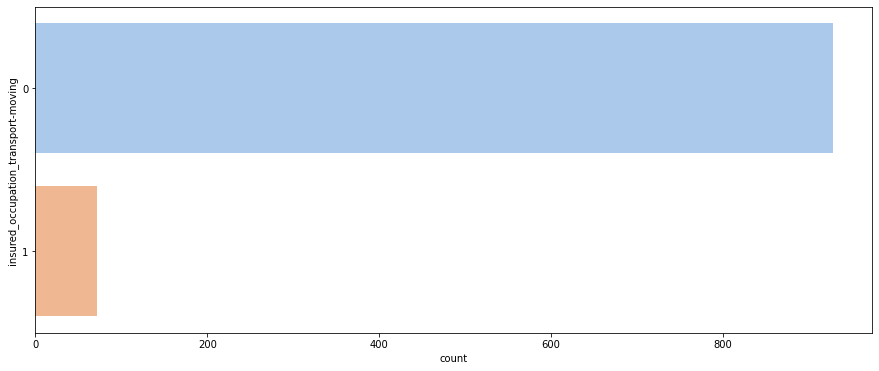

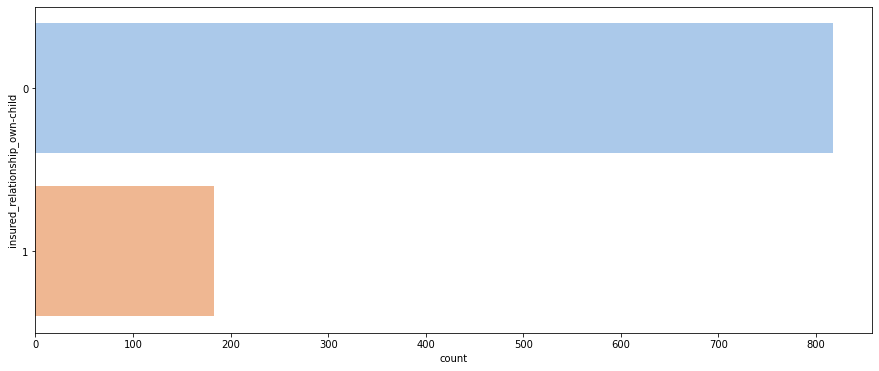

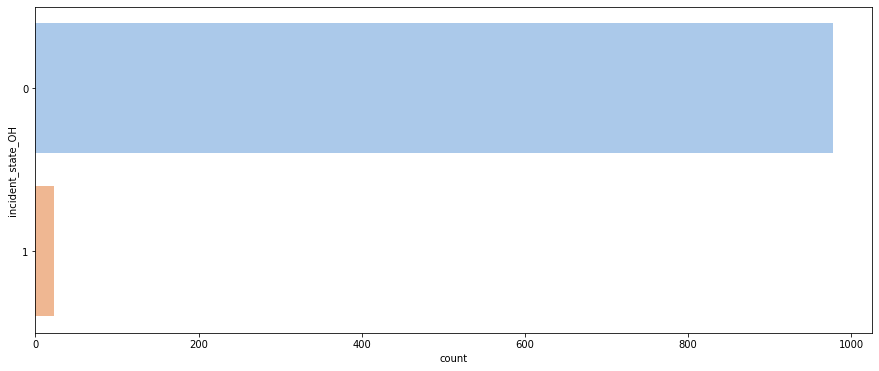

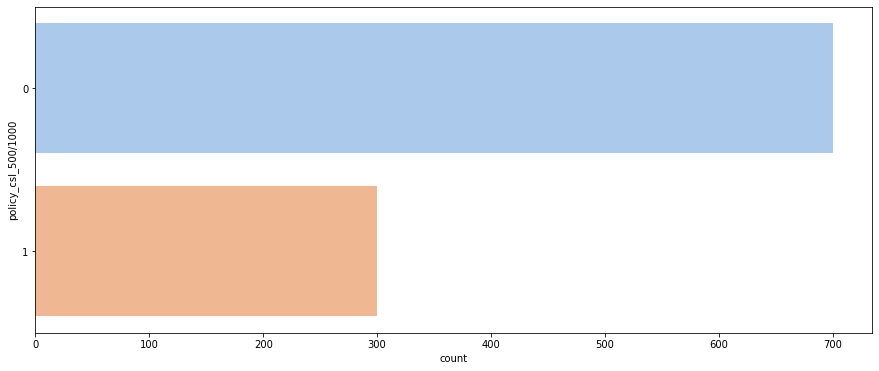

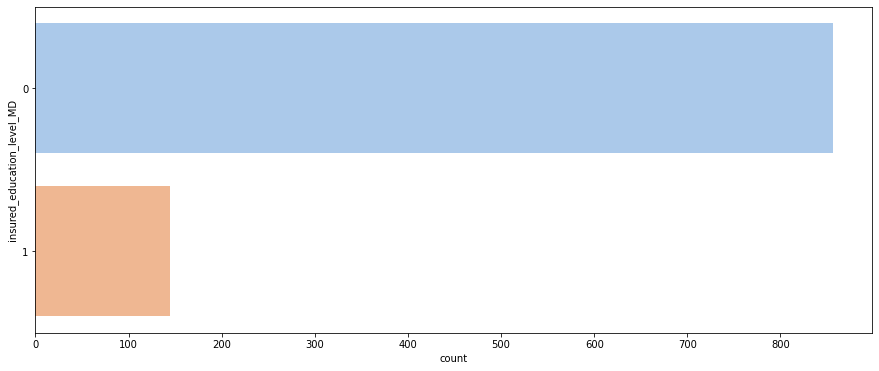

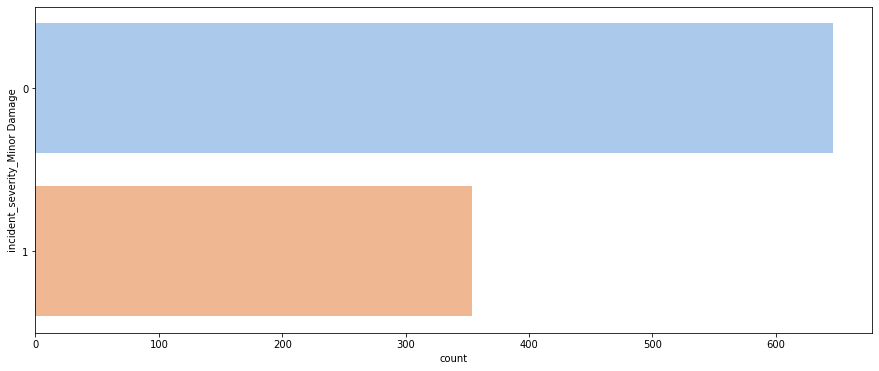

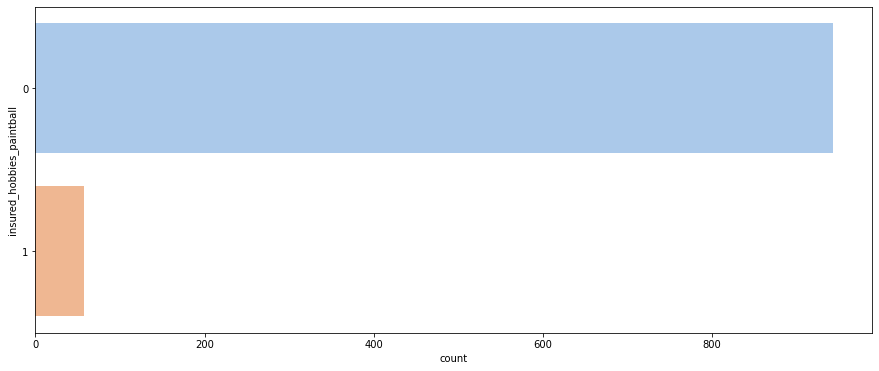

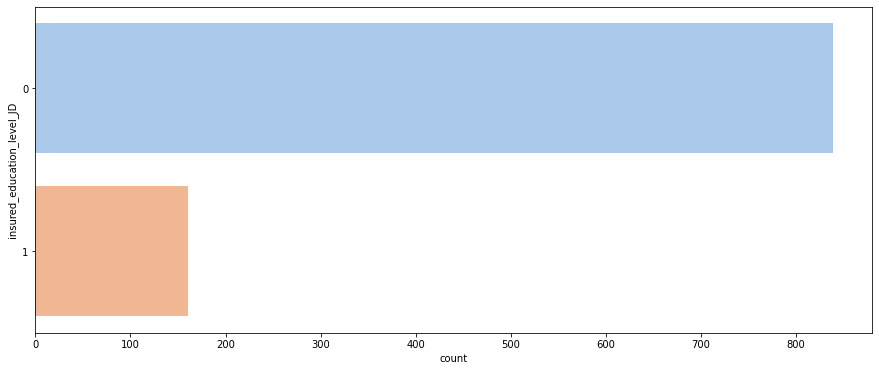

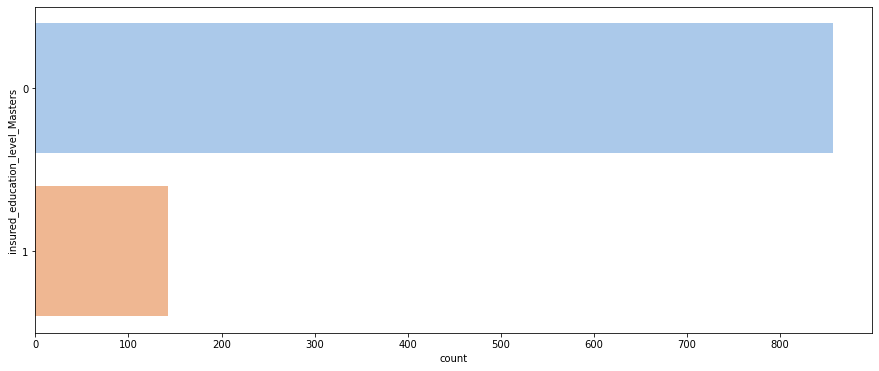

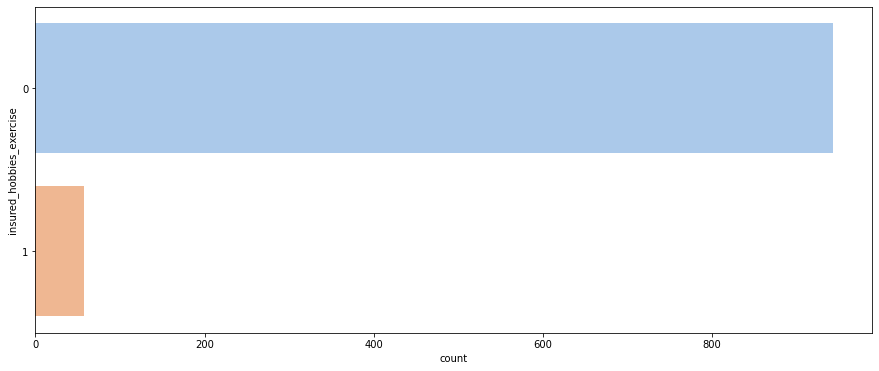

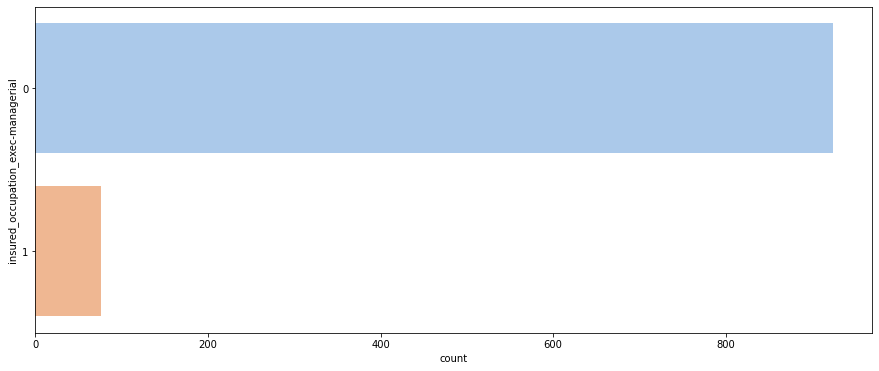

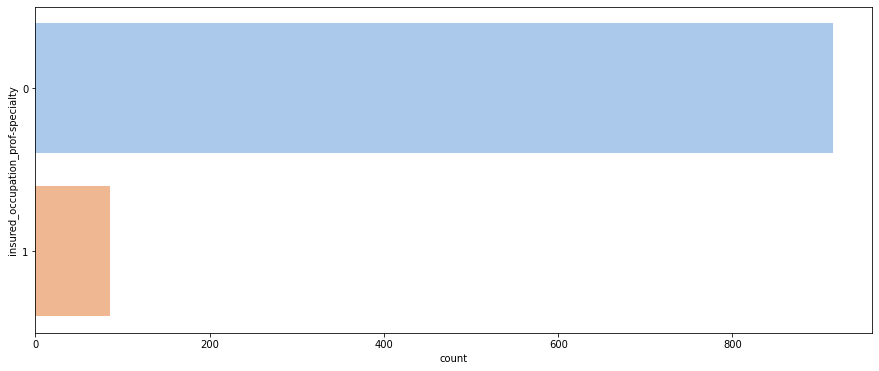

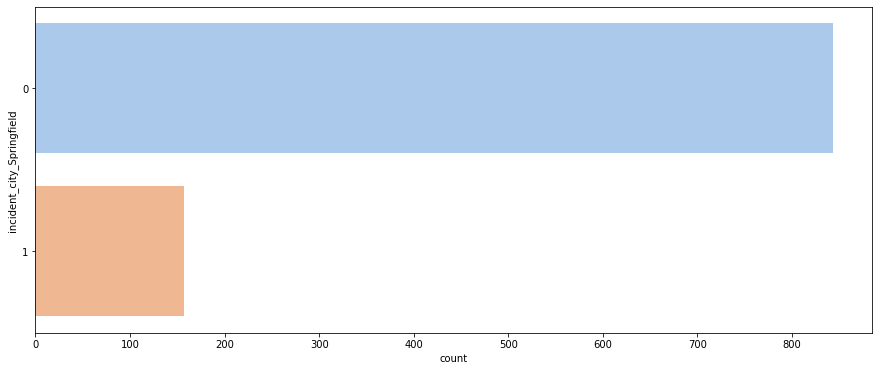

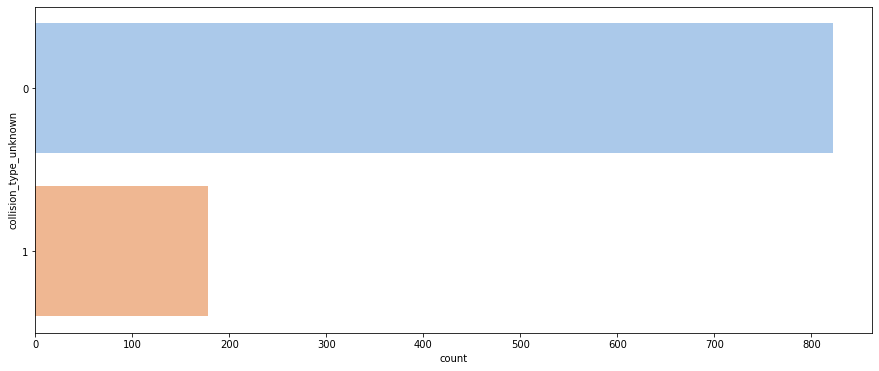

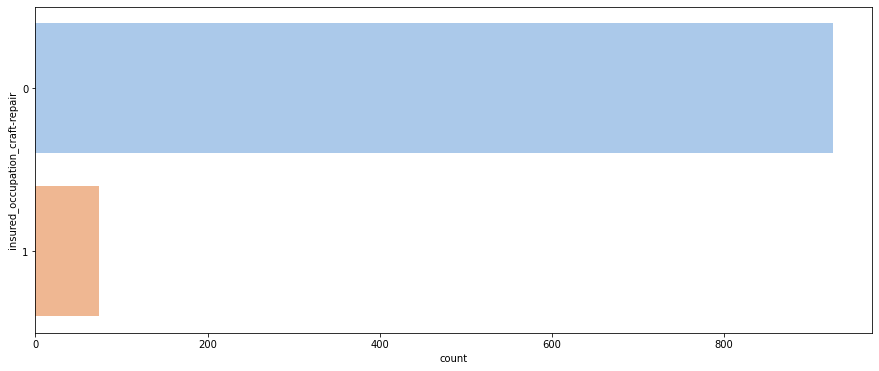

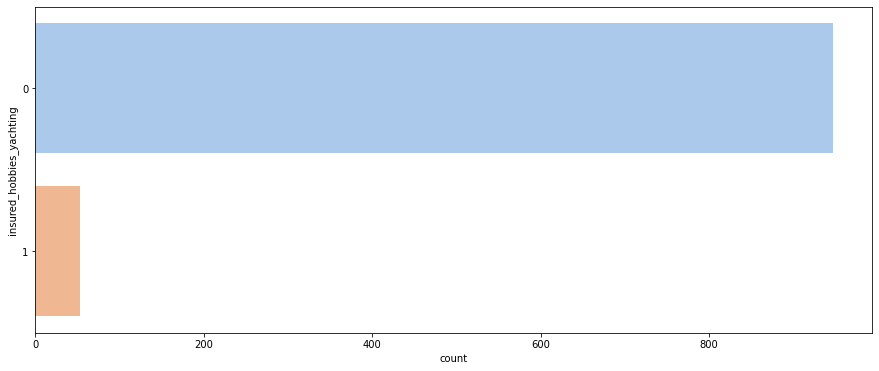

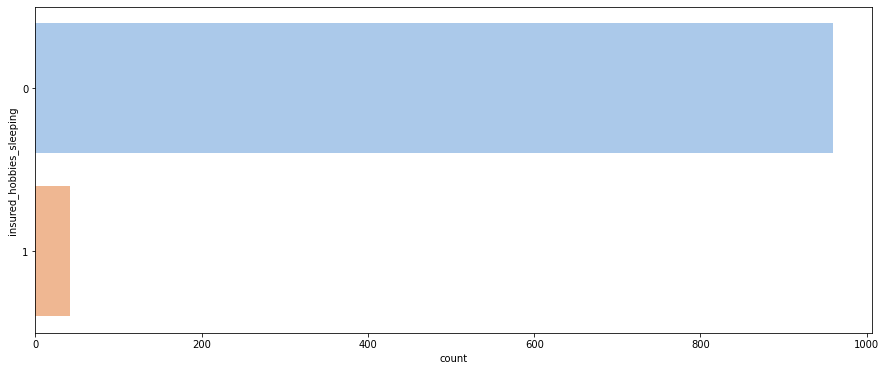

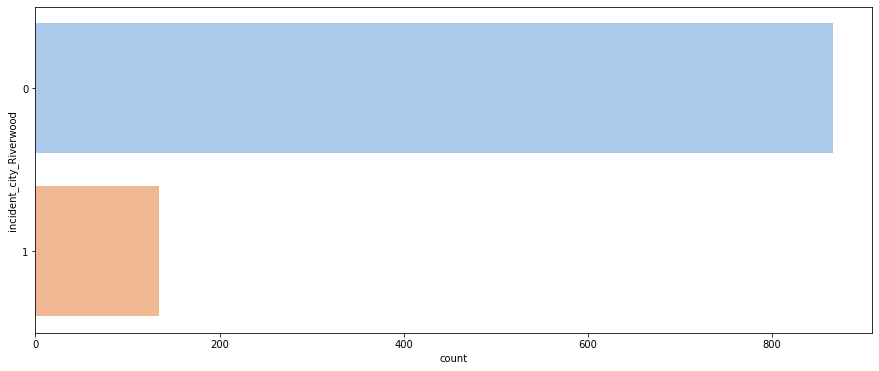

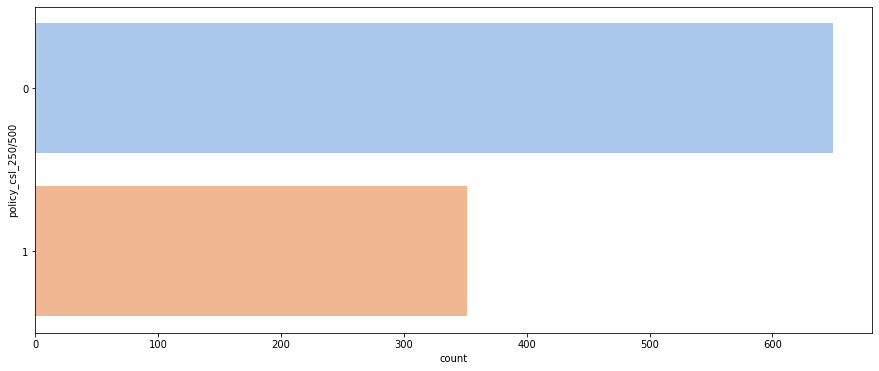

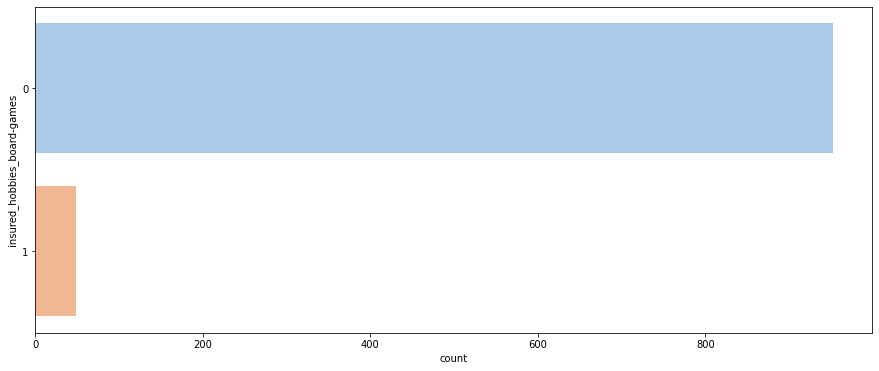

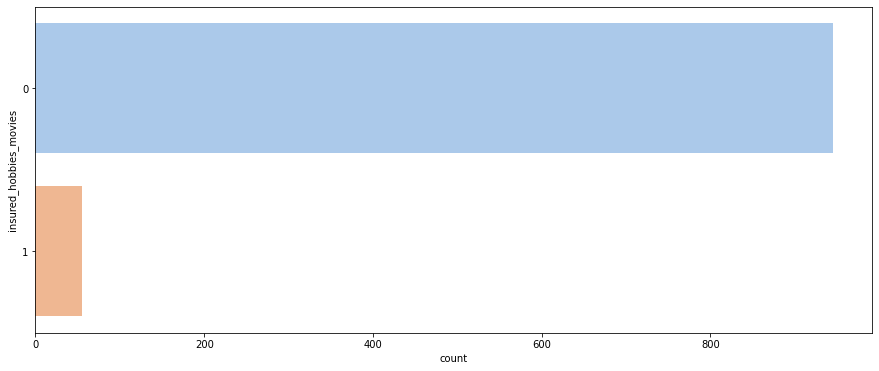

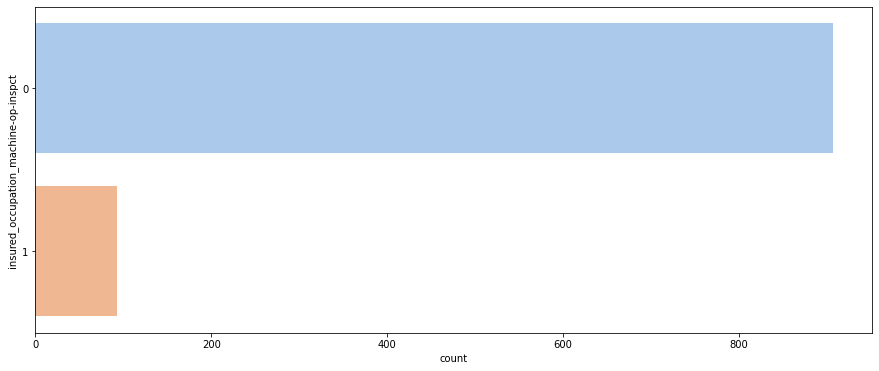

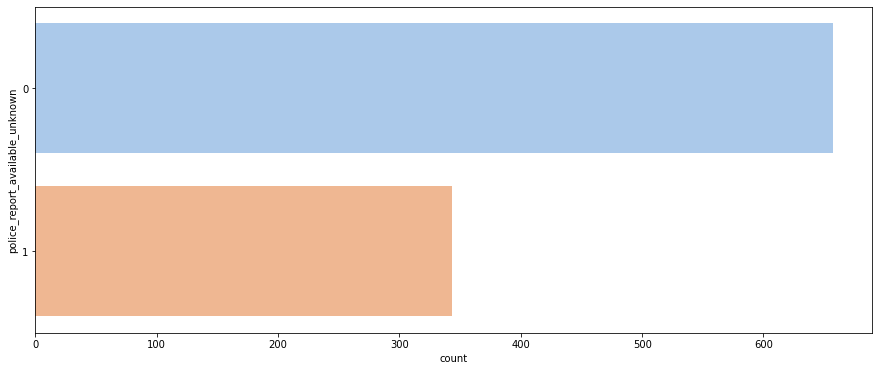

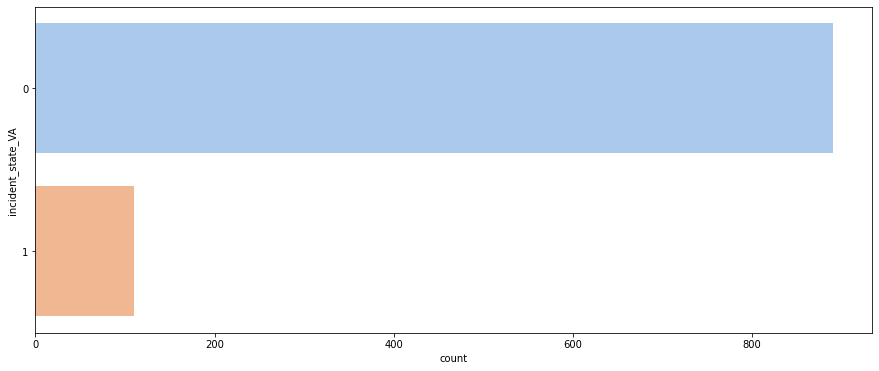

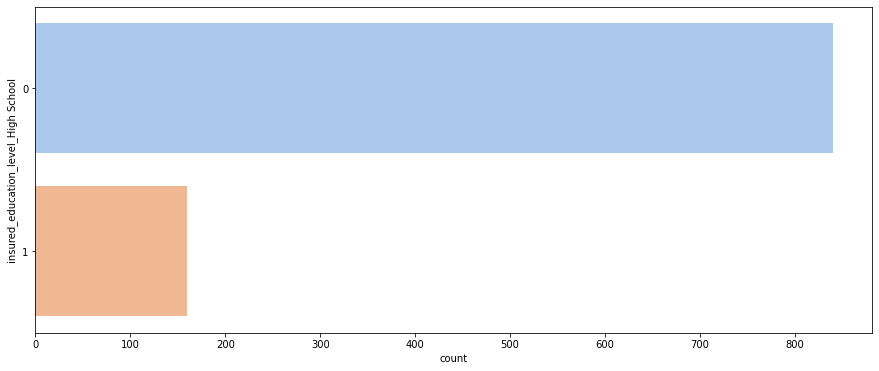

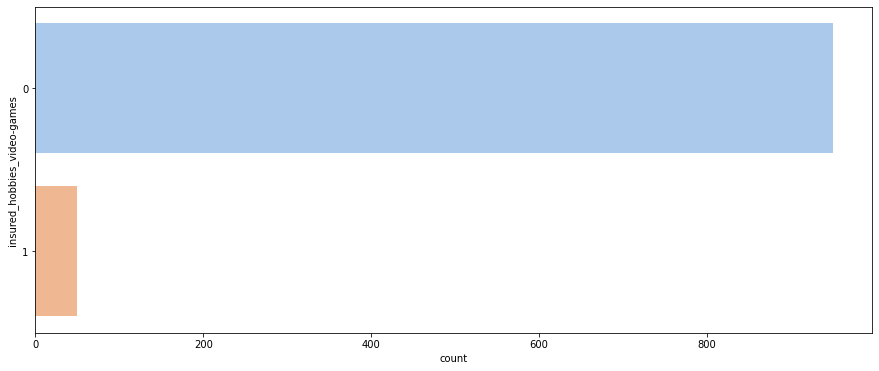

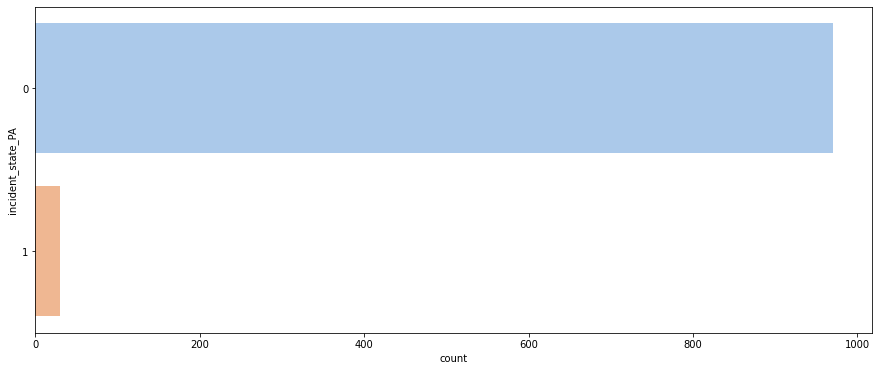

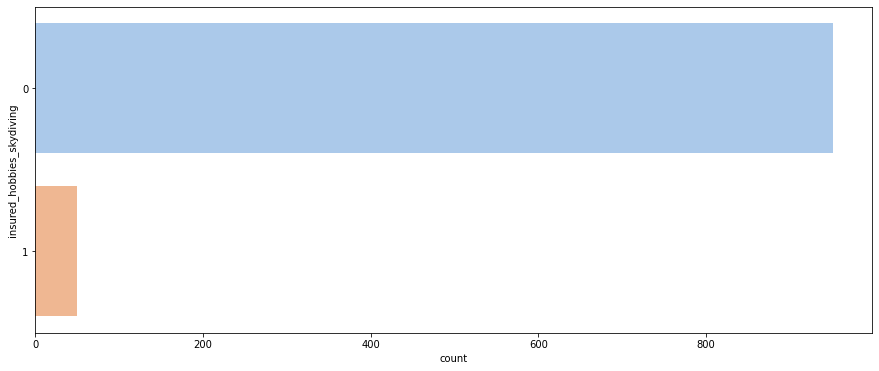

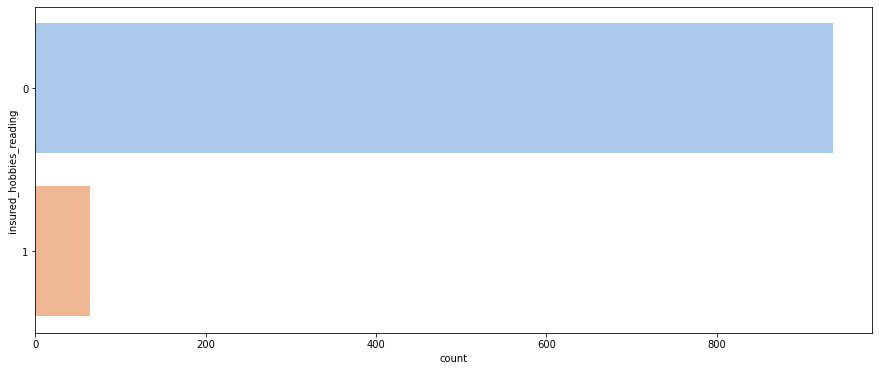

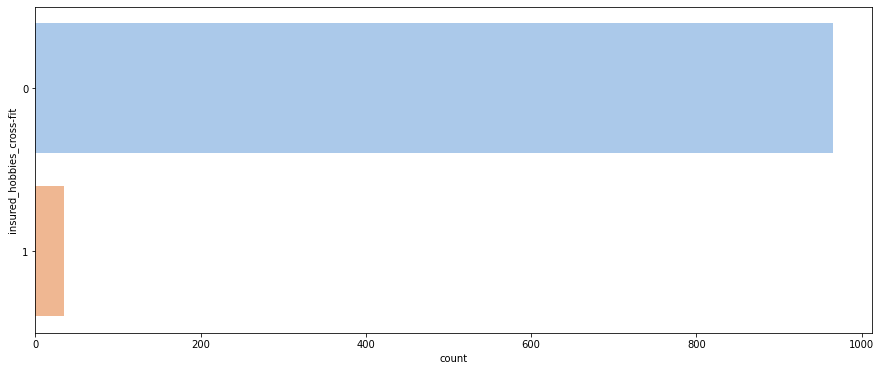

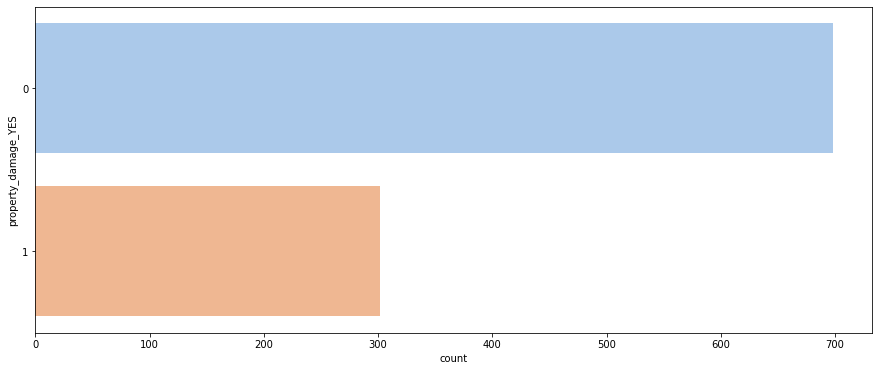

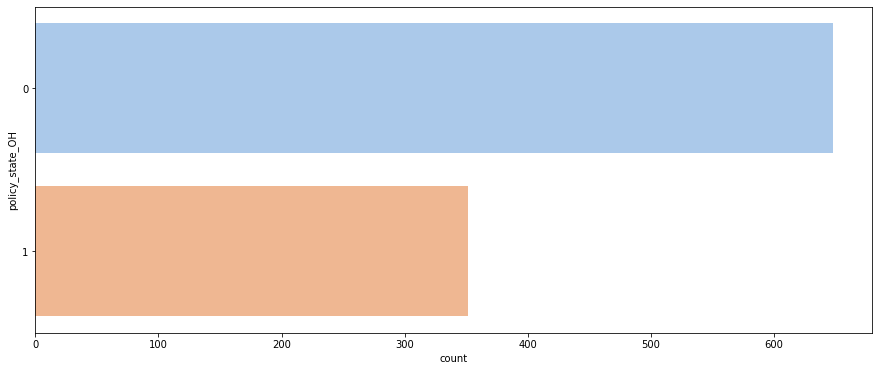

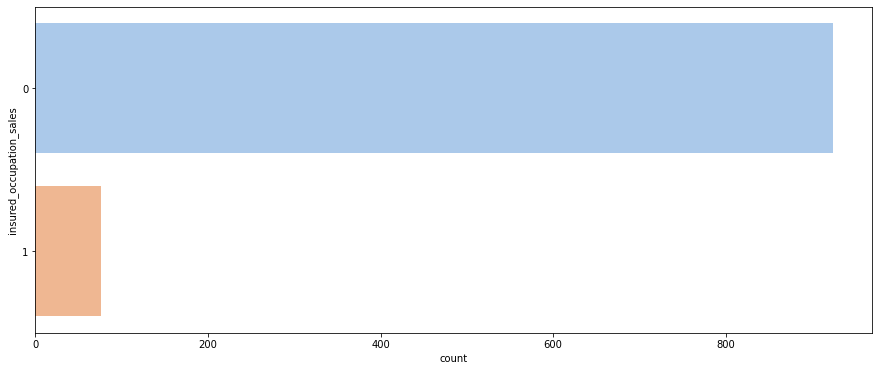

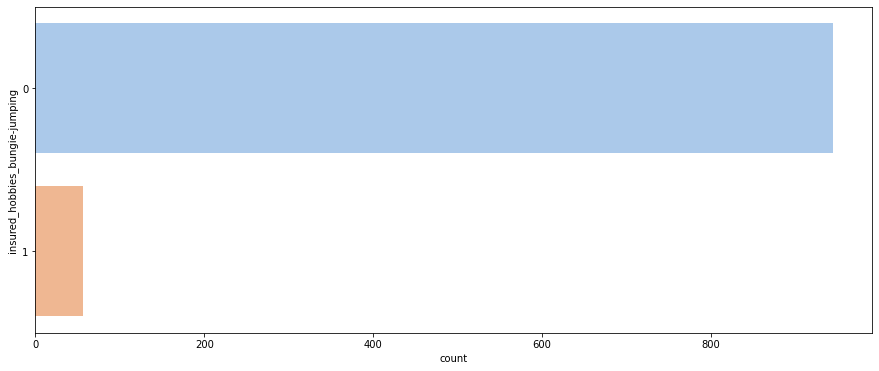

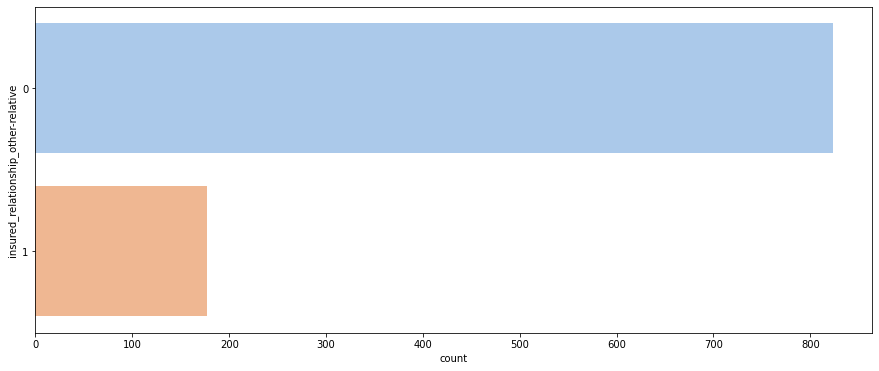

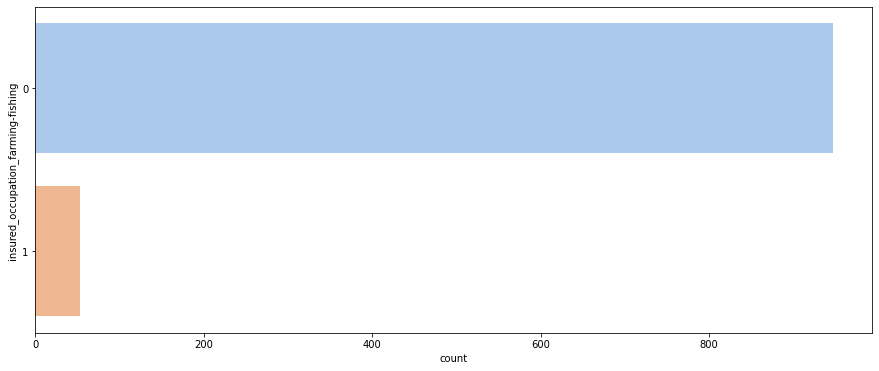

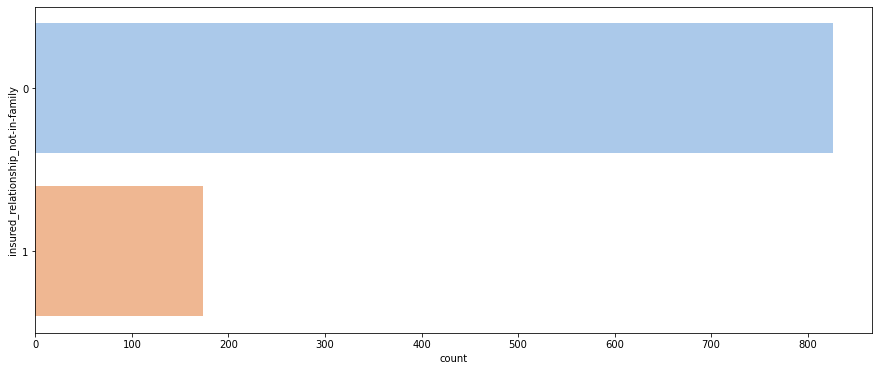

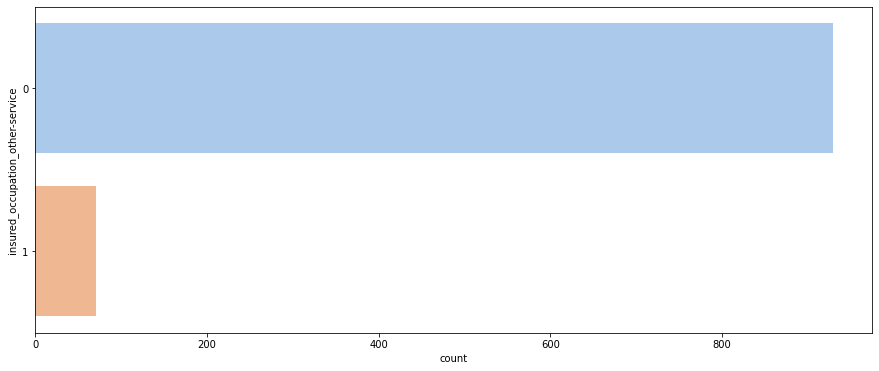

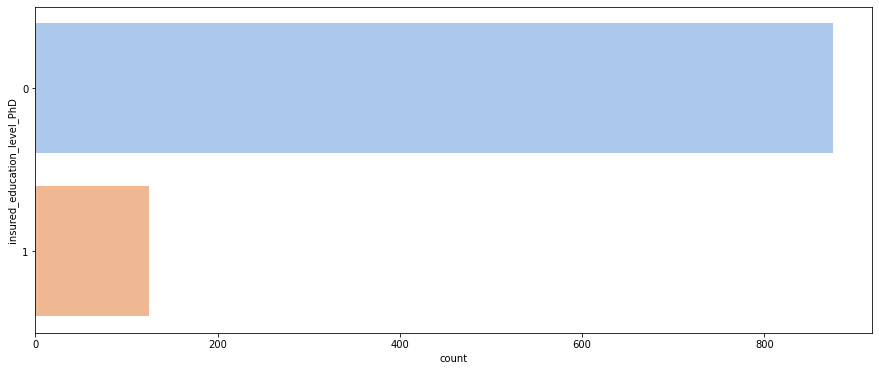

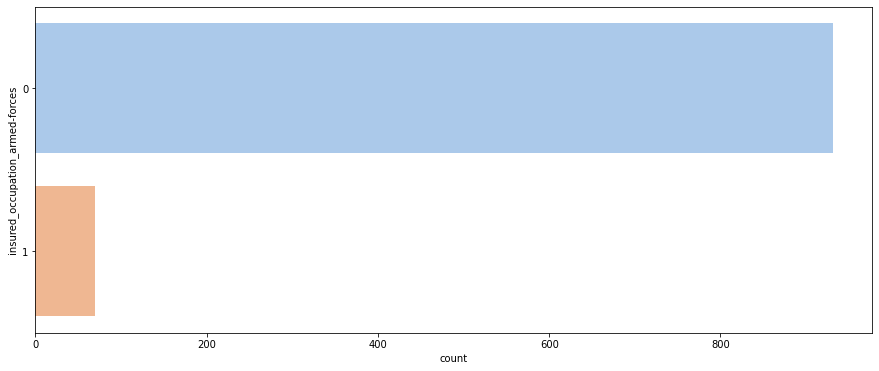

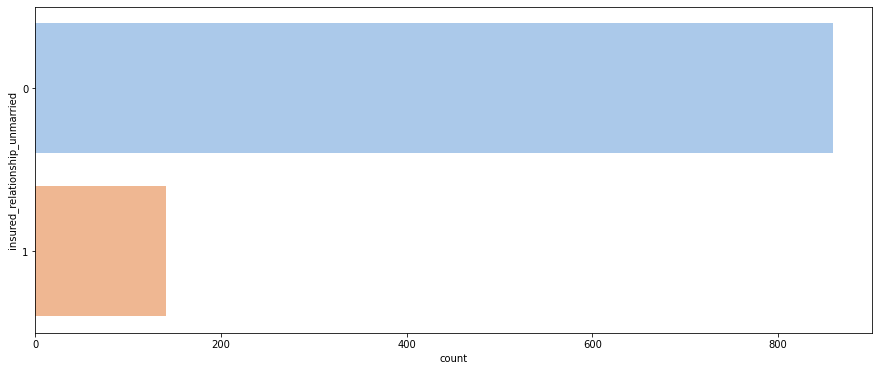

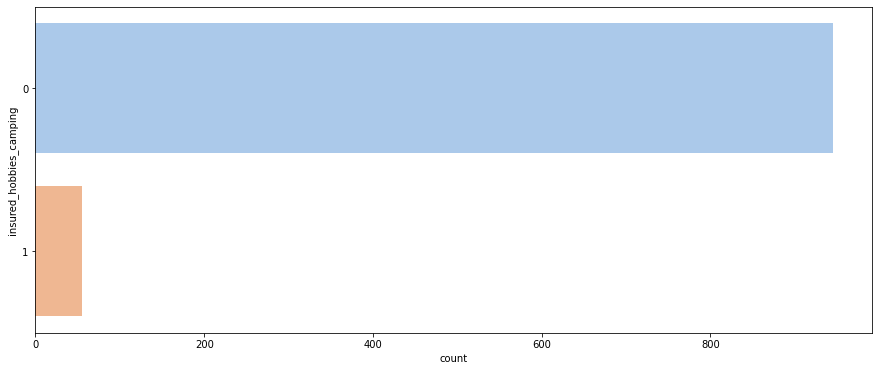

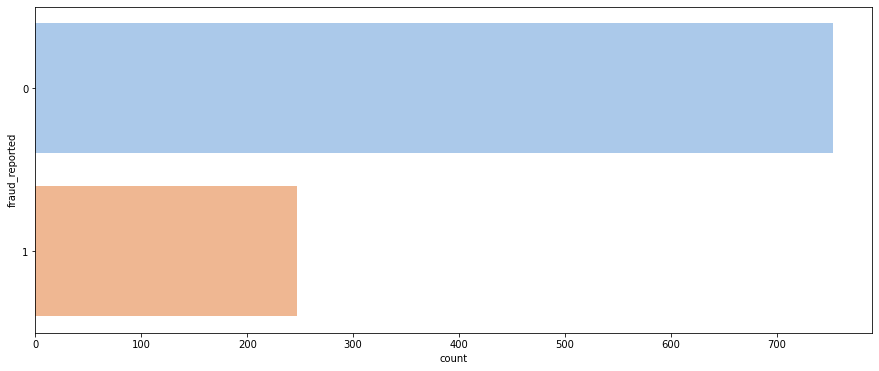

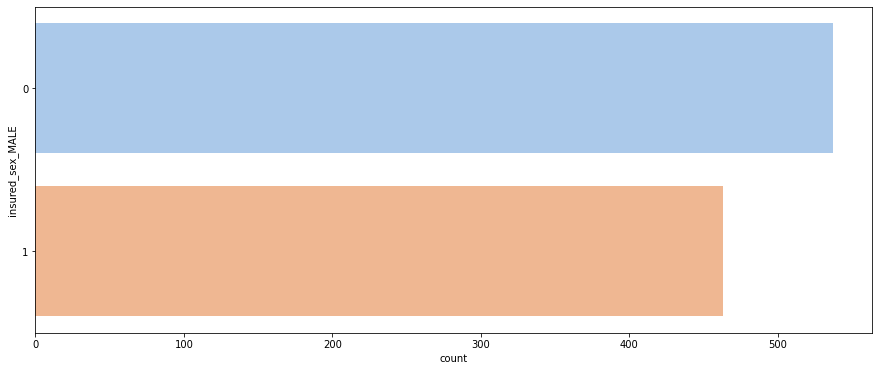

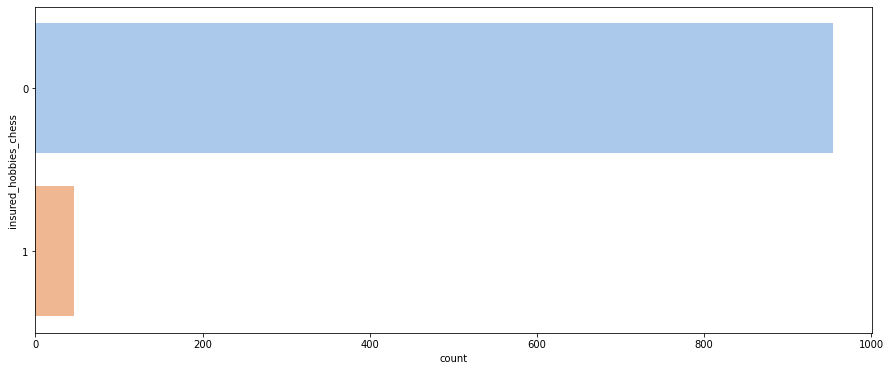

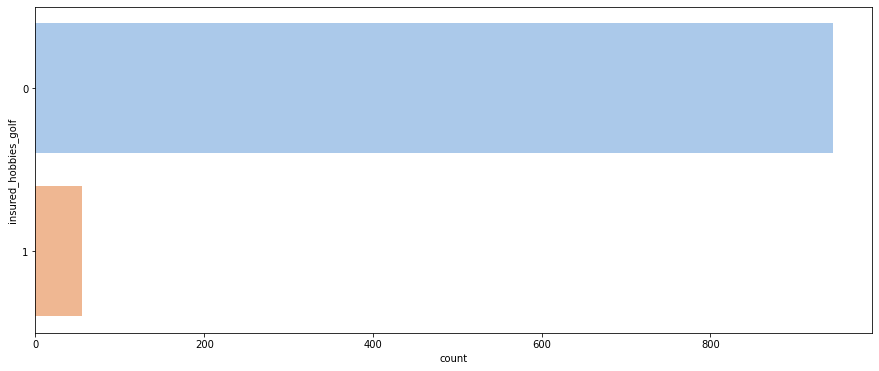

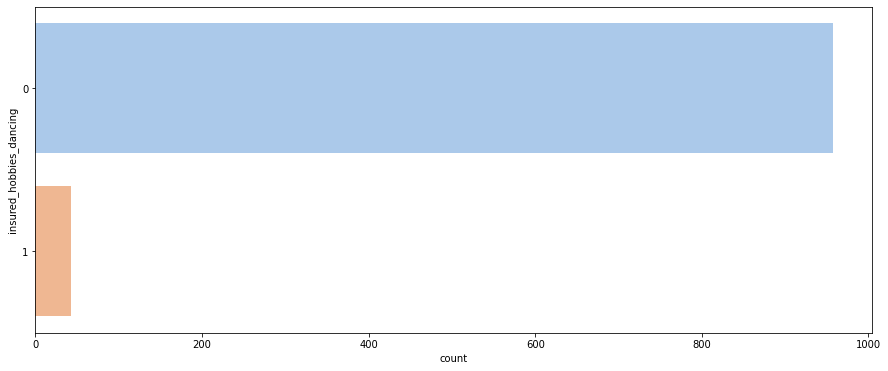

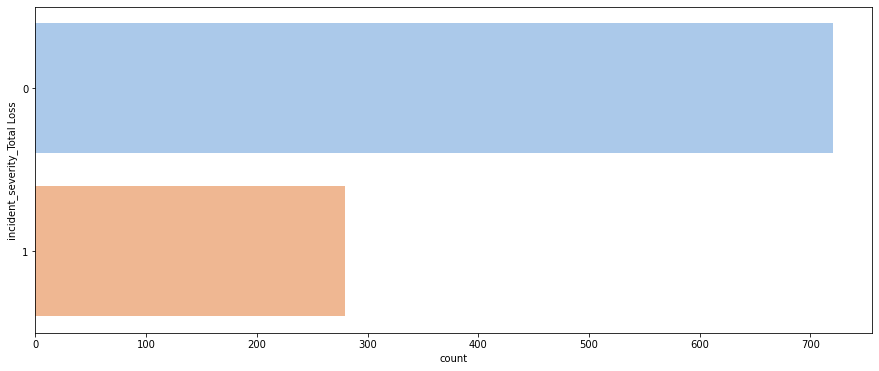

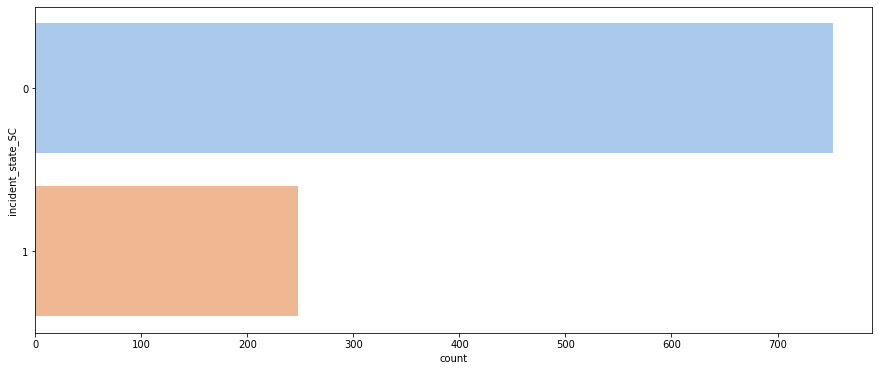

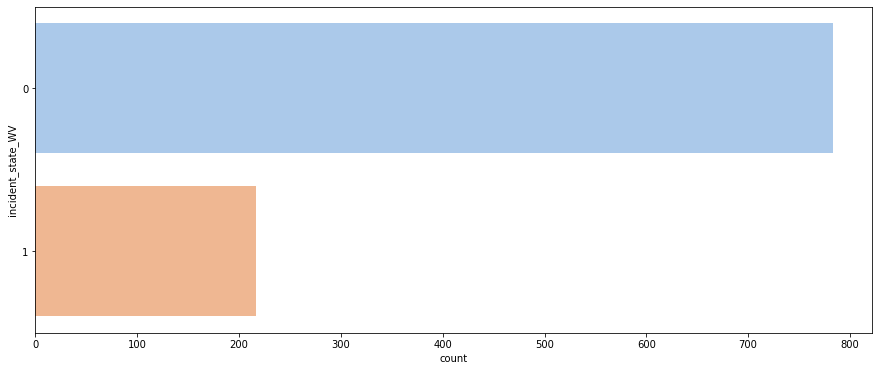

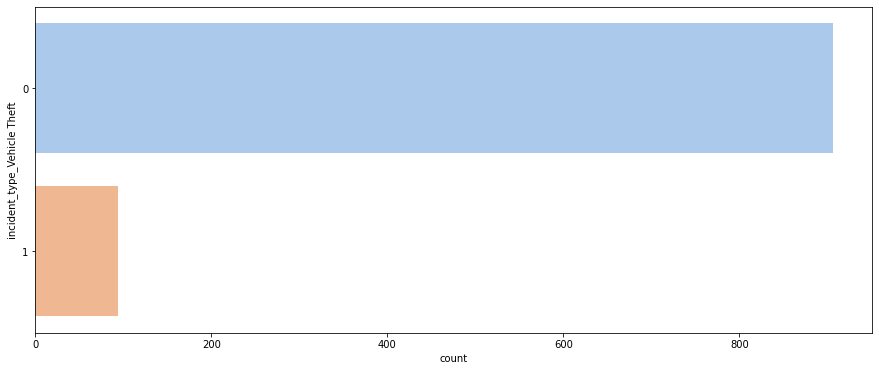

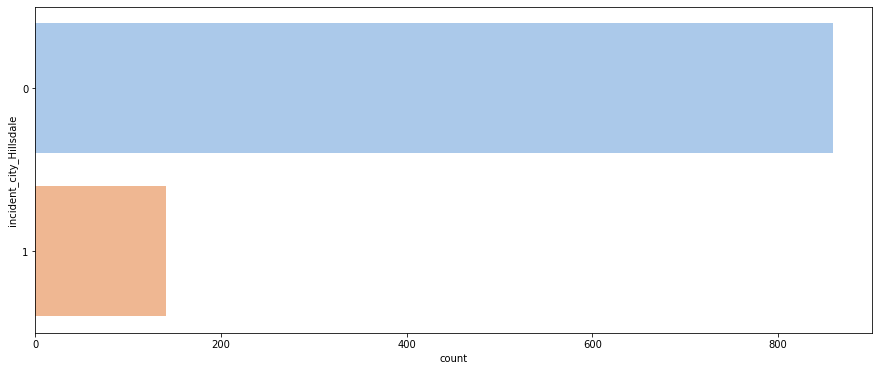

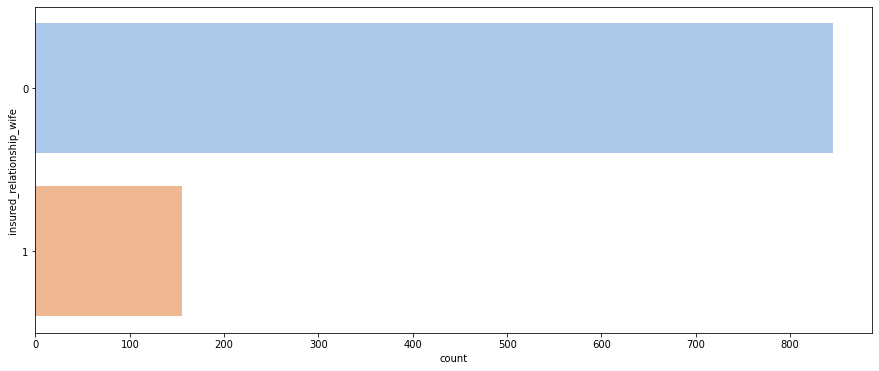

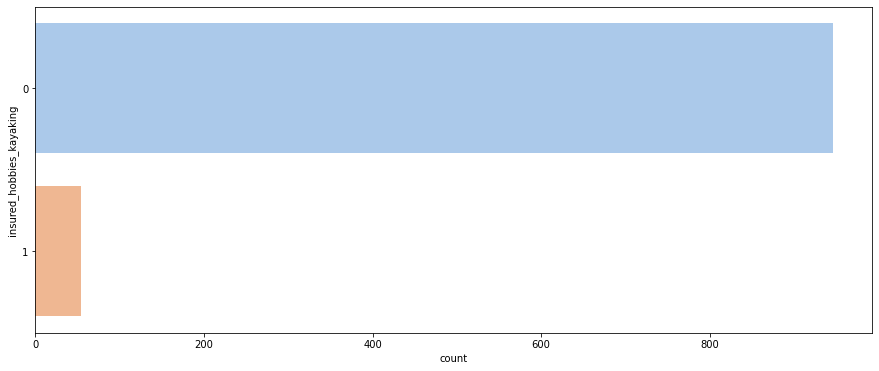

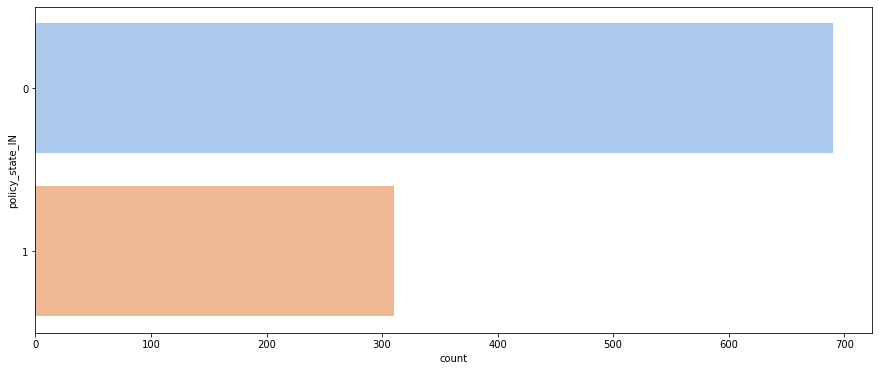

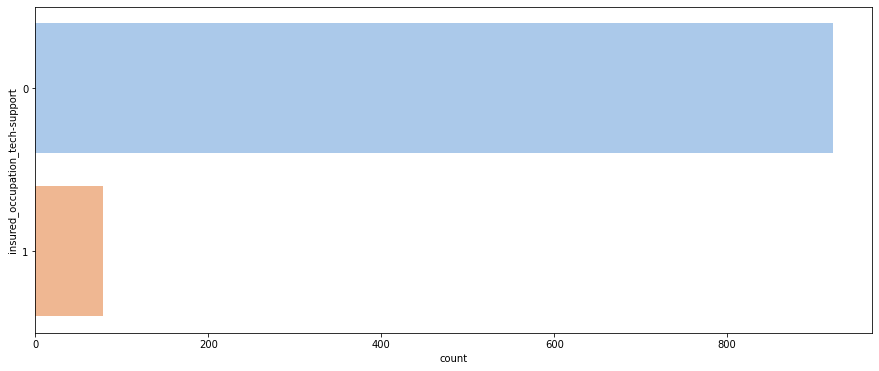

In [43]:
#countplot of discrete variables 

for i, name in enumerate(df[nom_var]):
    plt.figure(i,figsize=(15,6))
    sns.countplot(y=name, data=df, palette="pastel")

In [44]:
#### Following is the information observed from above graphs:
#### Springfield and Arlington has highest number of incidents followed by other cities which are mostly even
#### Apart from auto make of Honda which is the least, most are relatively even.
#### Police are the most frequently contacted followed by the fire brigades.
#### Most incidents are by multivehicle collision and single vehicle collision. Few incidents are by theft/parked car. 

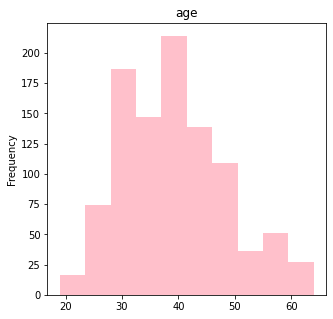

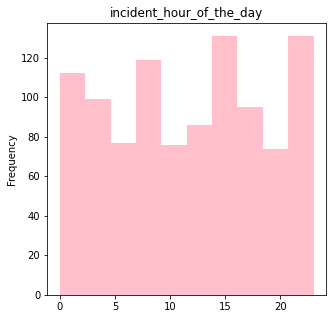

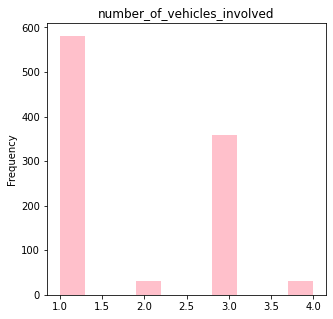

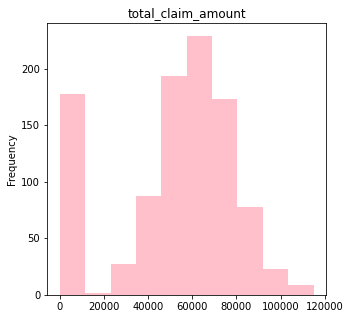

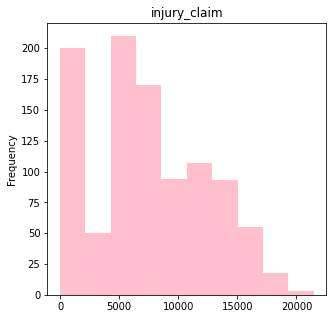

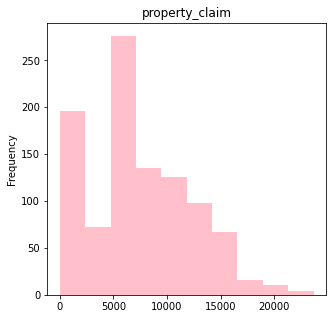

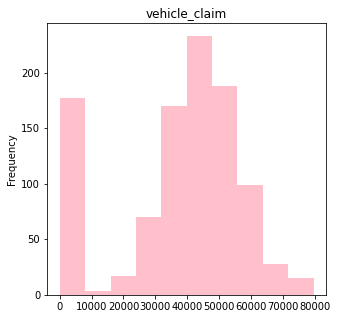

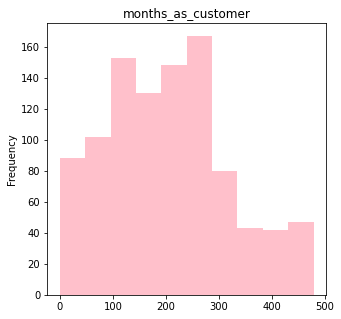

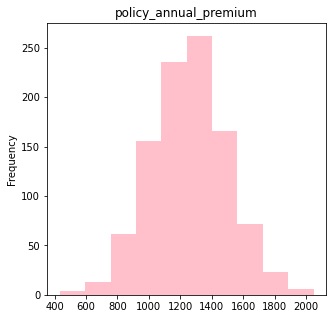

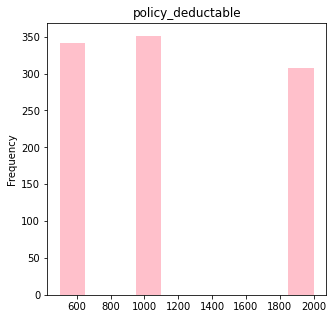

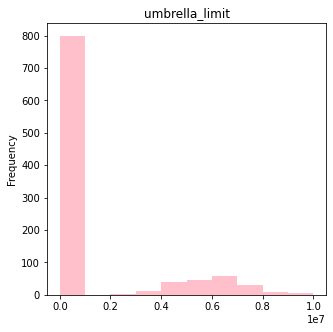

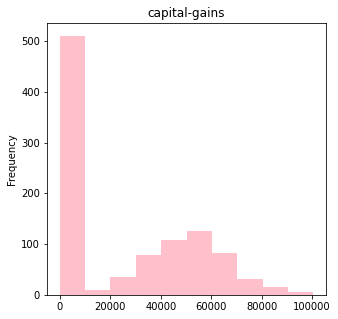

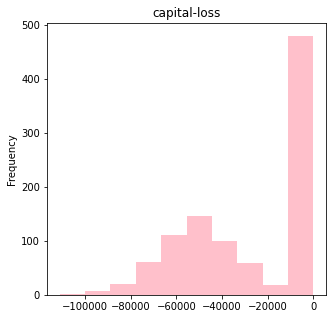

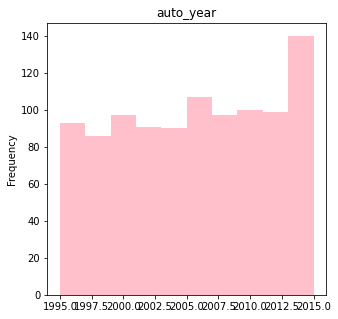

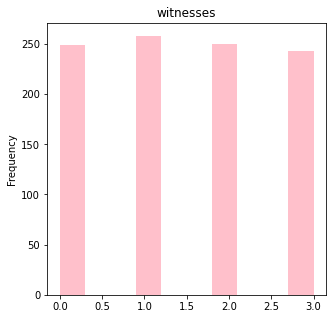

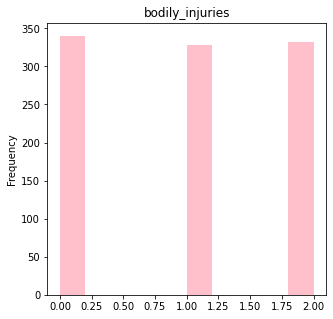

In [45]:
#distribution of Ordinal and Continuous variables

for i, name in enumerate(df[cont_var]):
    plt.figure(i,figsize=(5,5))
    df[name].plot(kind="hist", color="pink", title=name)

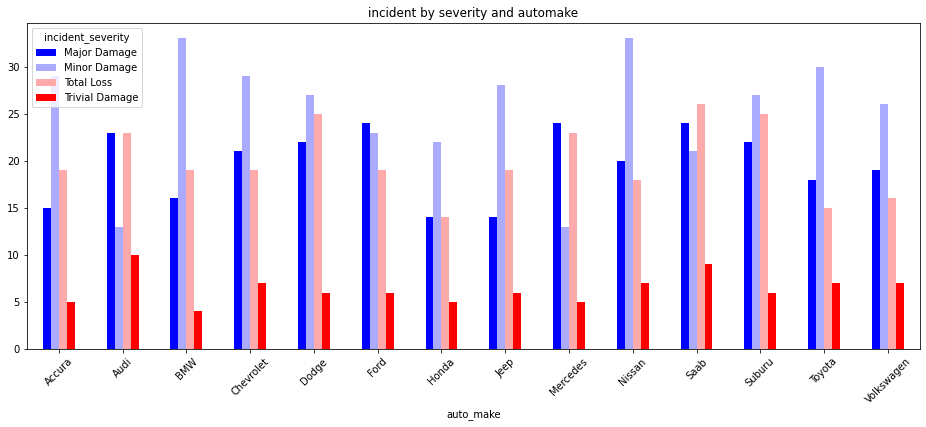

In [25]:
# auto make BMW, Nissan gets a lot into minor accident whereas fast cars like Dodge, subaru, saab, merc get into more severe accident

incident = pd.crosstab(df['auto_make'], df['incident_severity'])
incident.plot(kind='bar', colormap='bwr',figsize=(16,6))
plt.xticks(rotation=45)
plt.title("incident by severity and automake");

In [46]:
# Following is the information observed from above graphs:
# annual premium policy is normally distributed
# policy bind years has few years more popular than others, this may be because of the sale of auto. 

c:\users\sbalani\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.


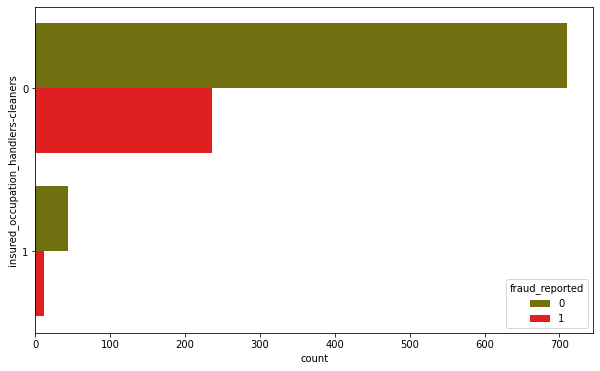

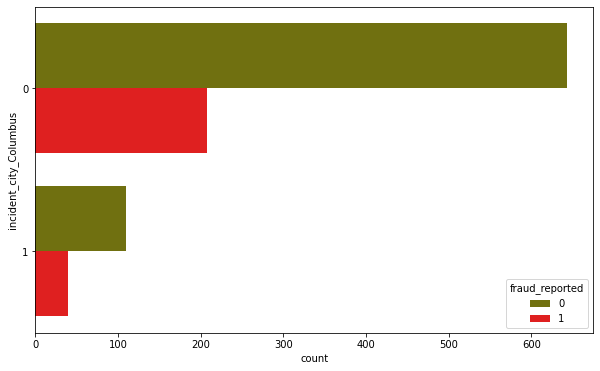

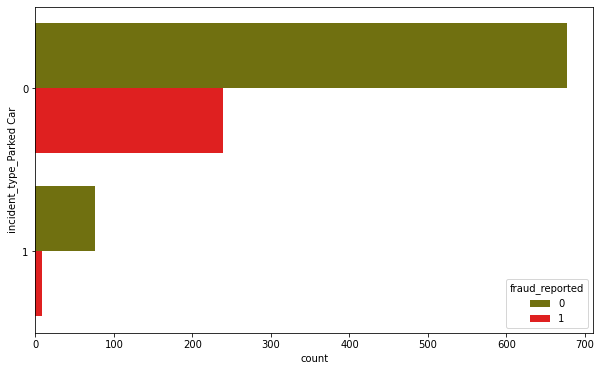

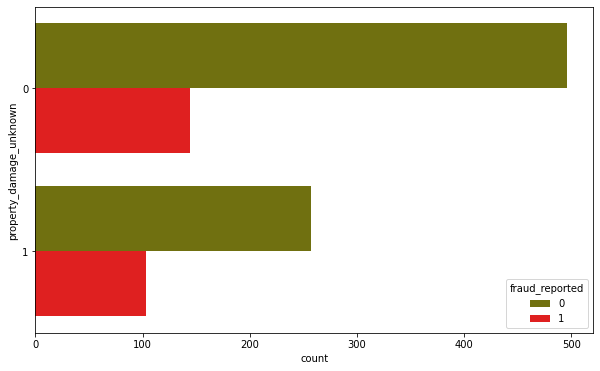

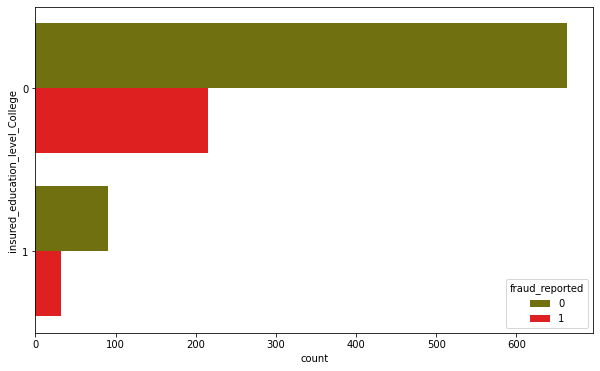

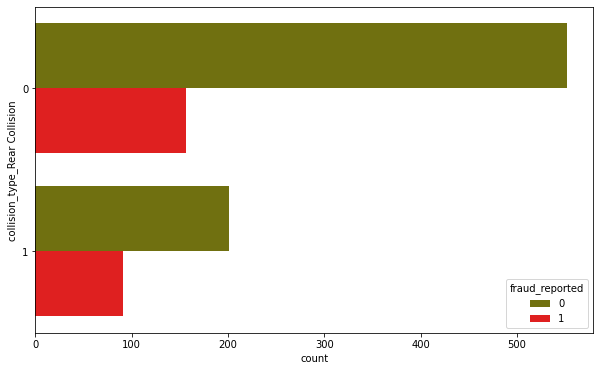

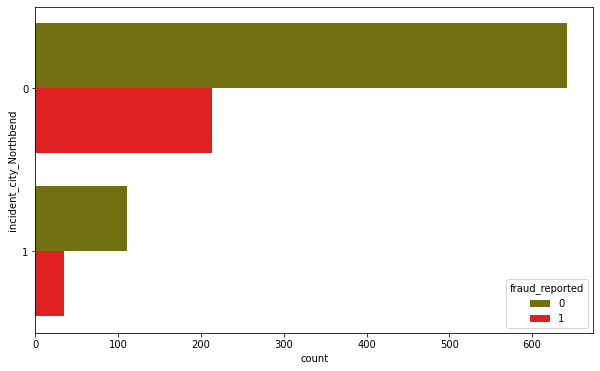

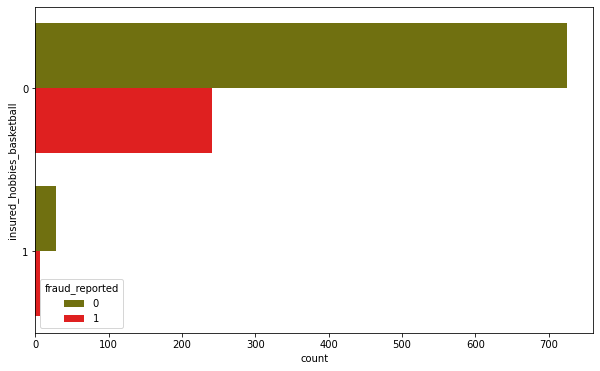

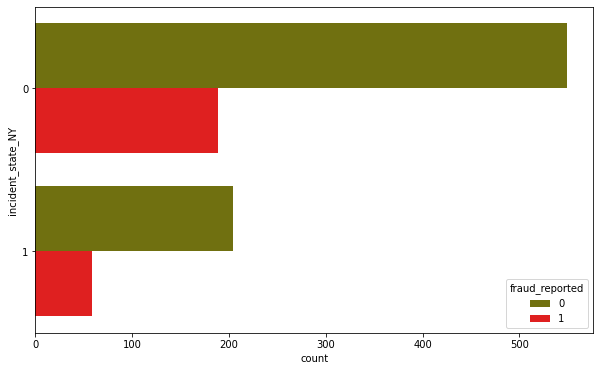

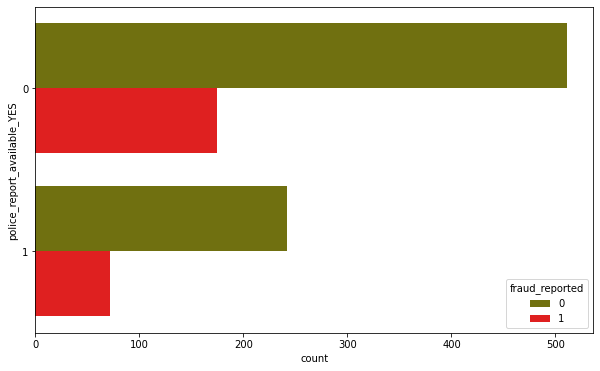

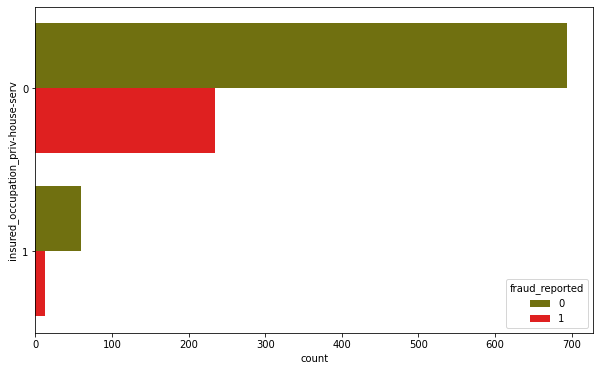

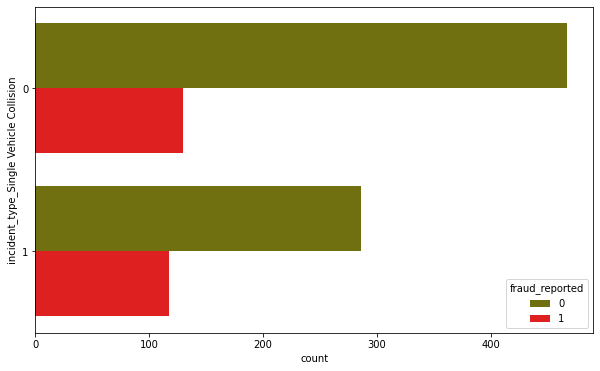

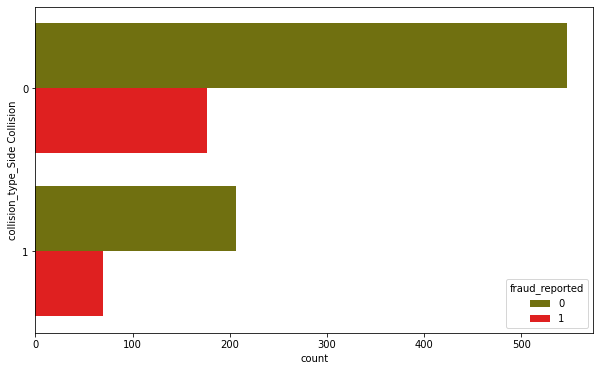

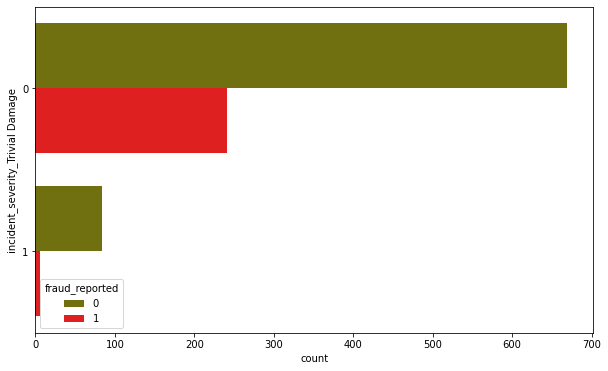

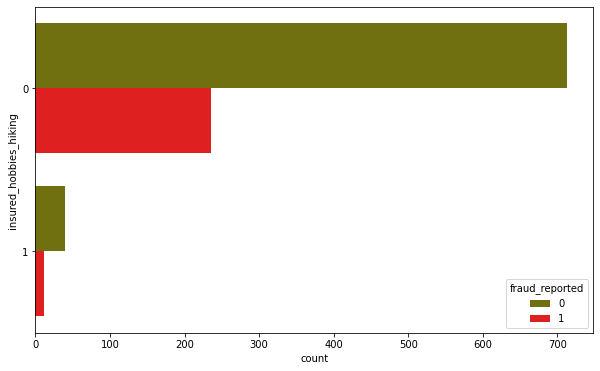

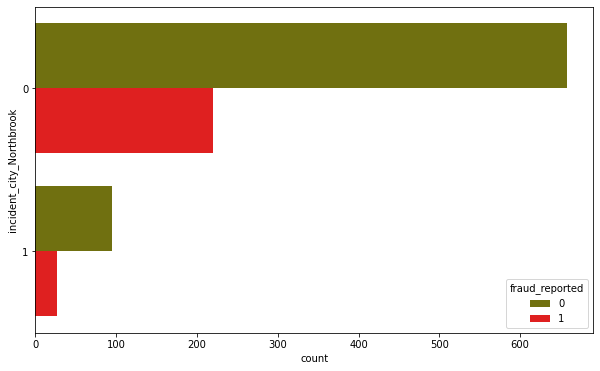

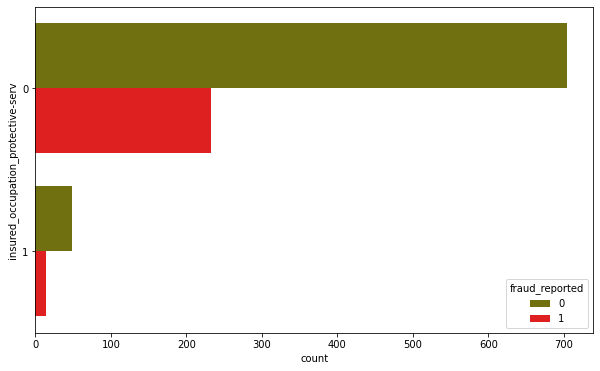

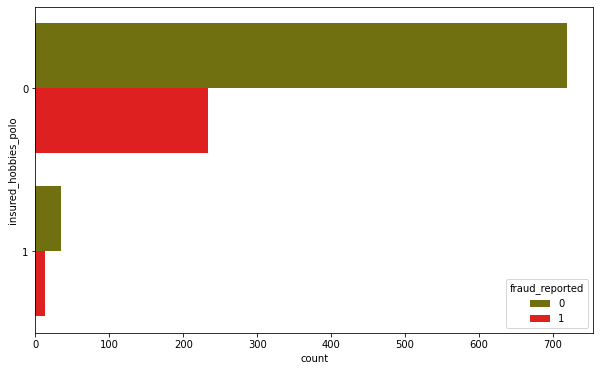

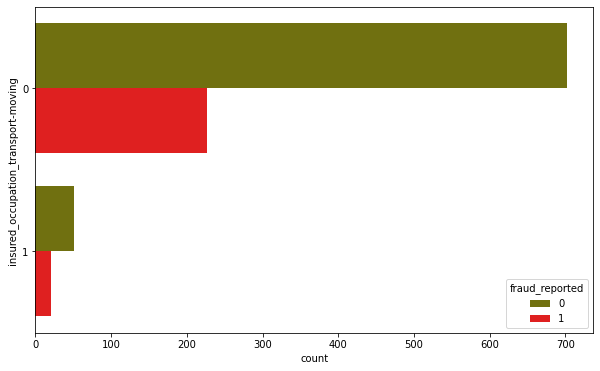

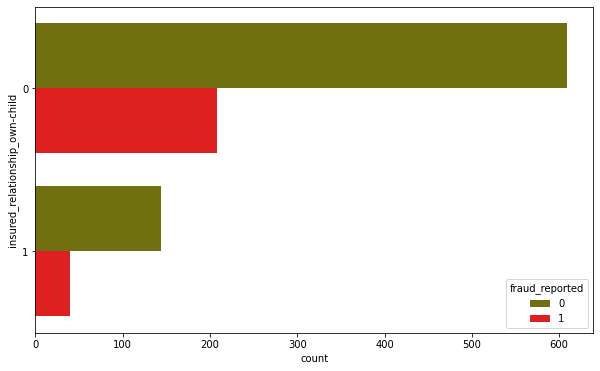

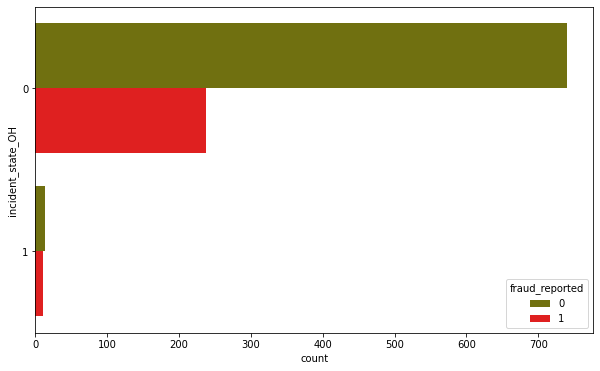

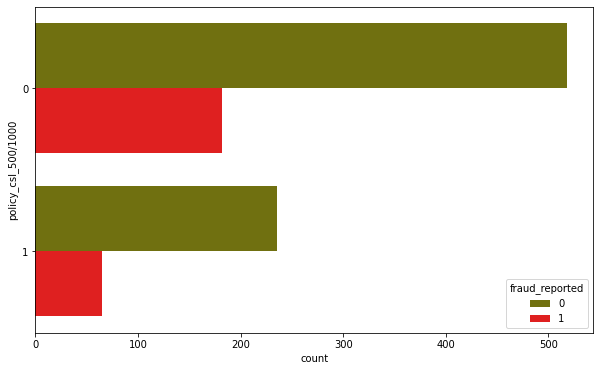

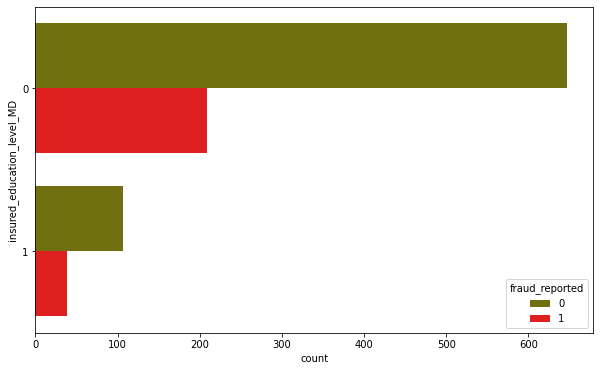

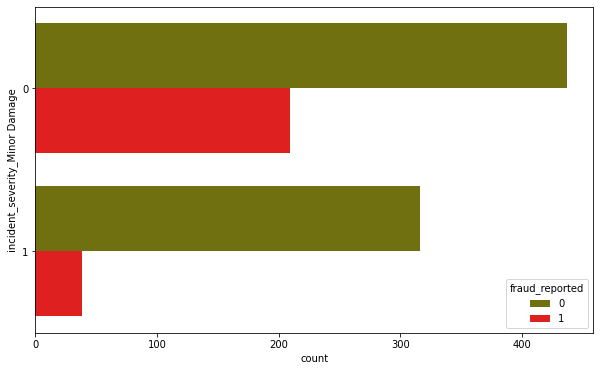

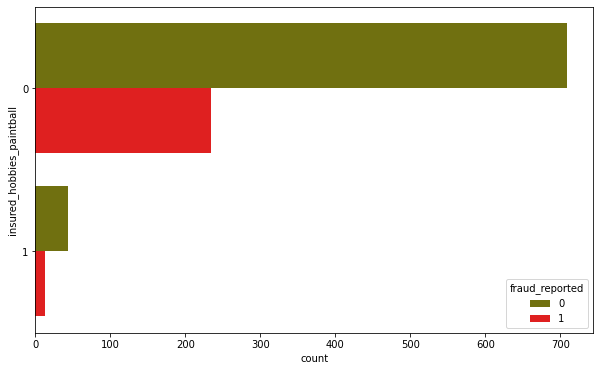

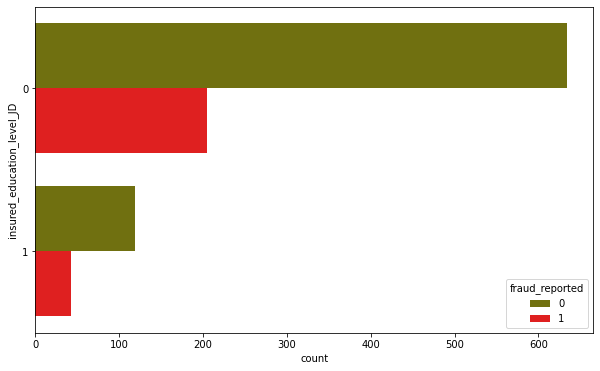

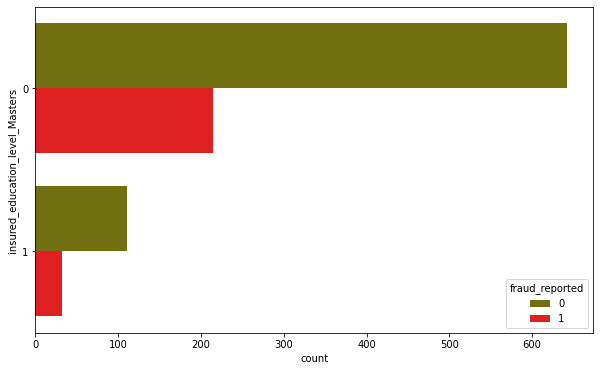

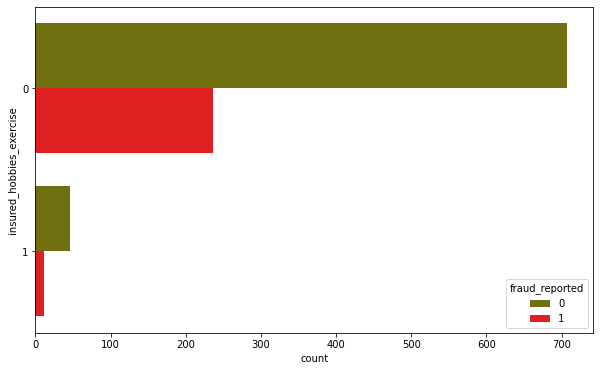

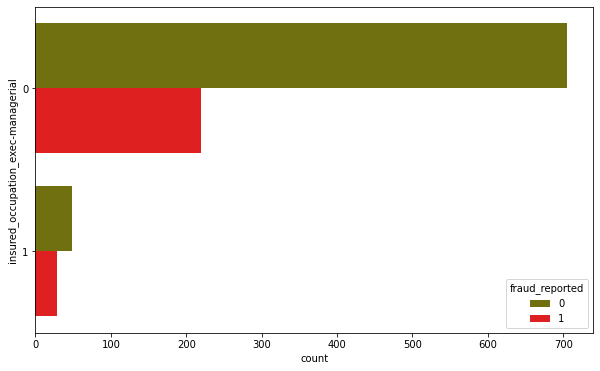

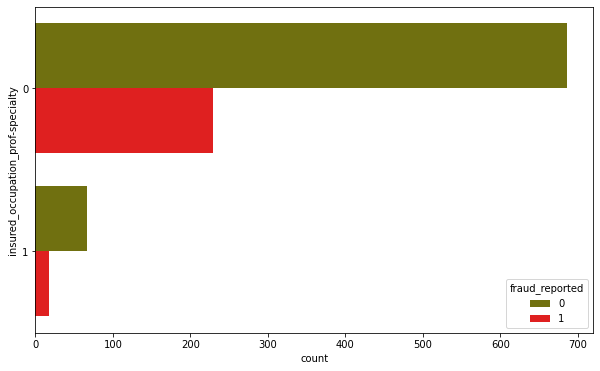

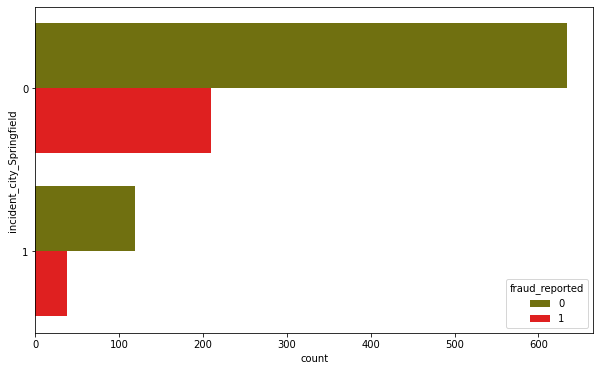

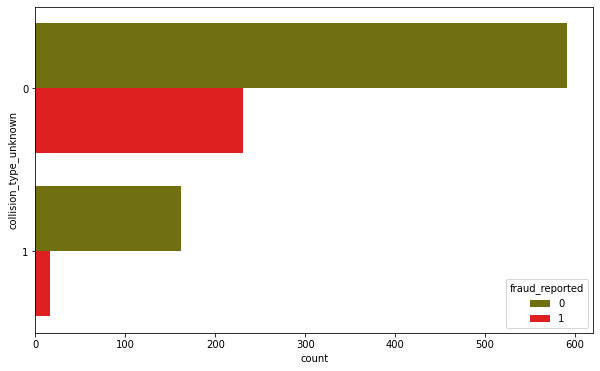

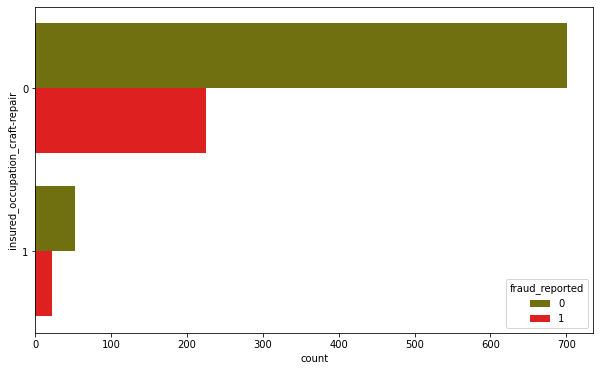

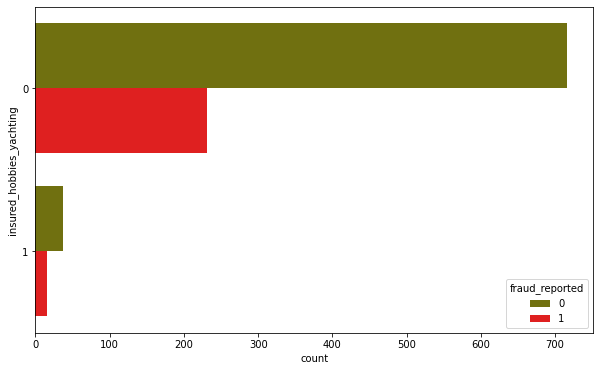

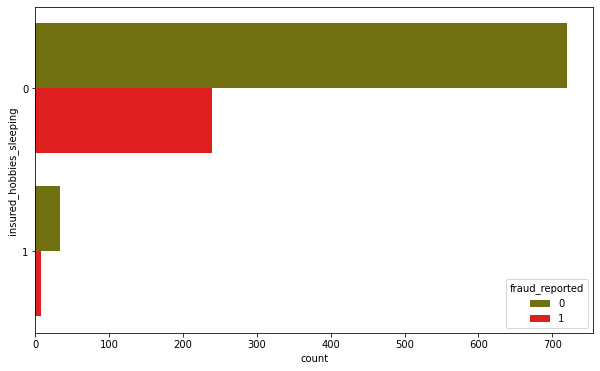

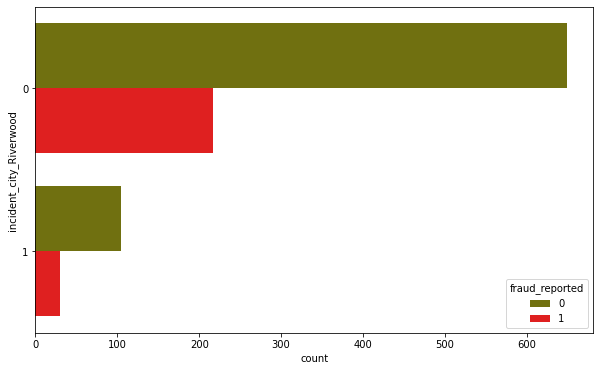

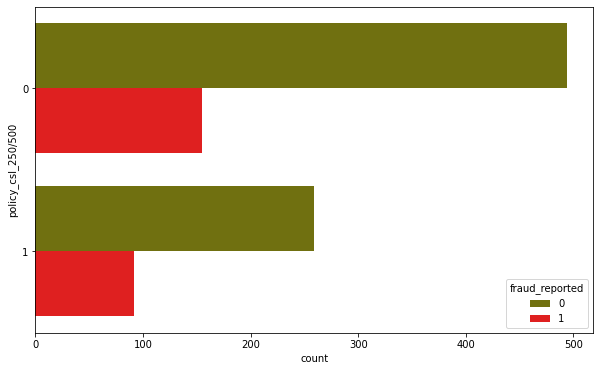

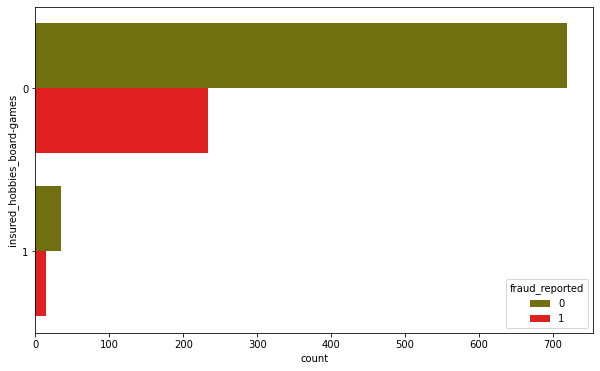

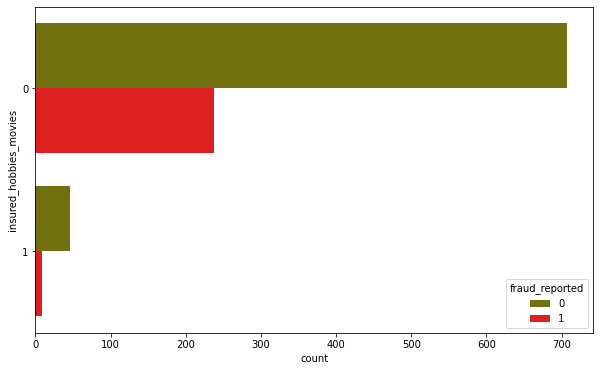

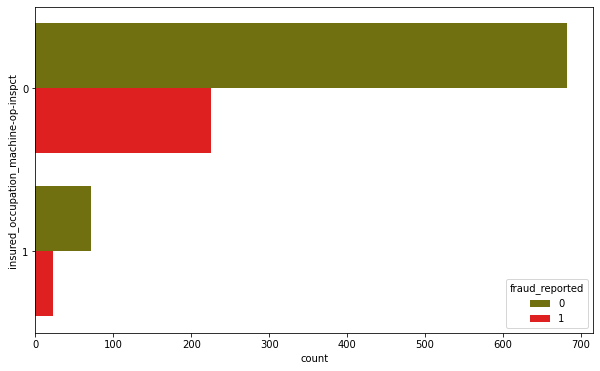

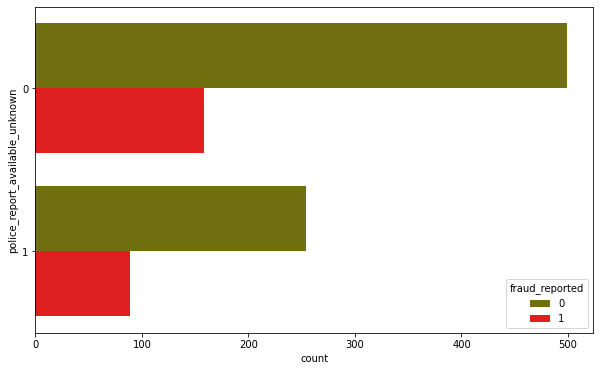

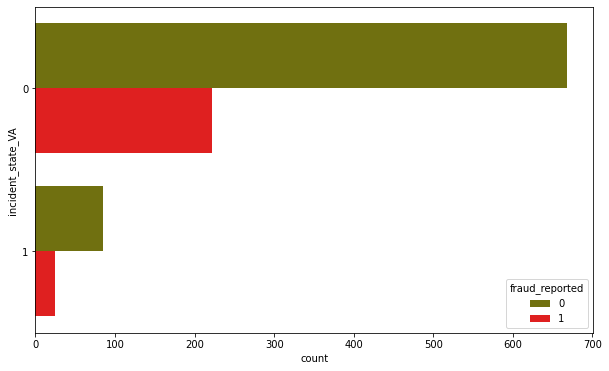

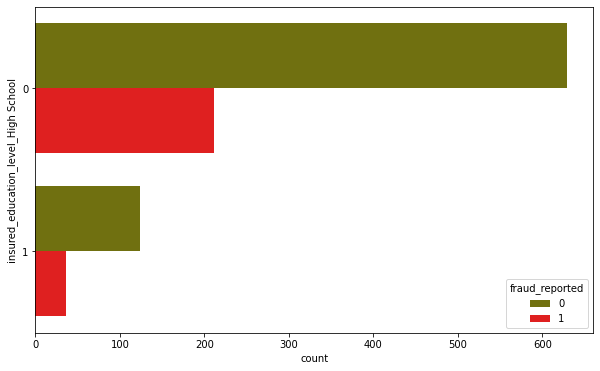

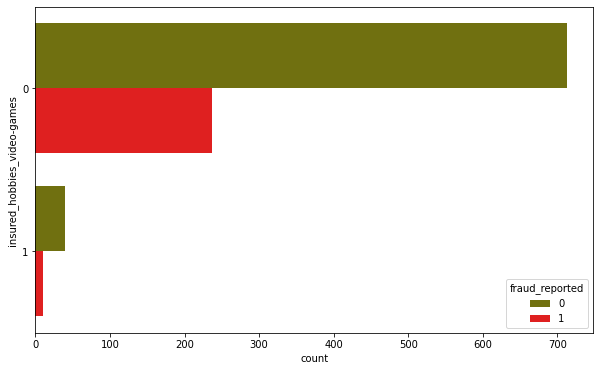

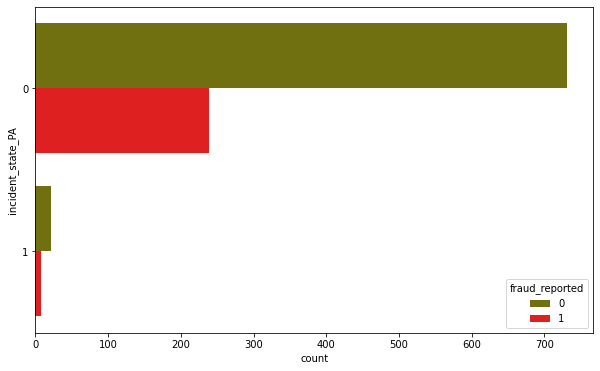

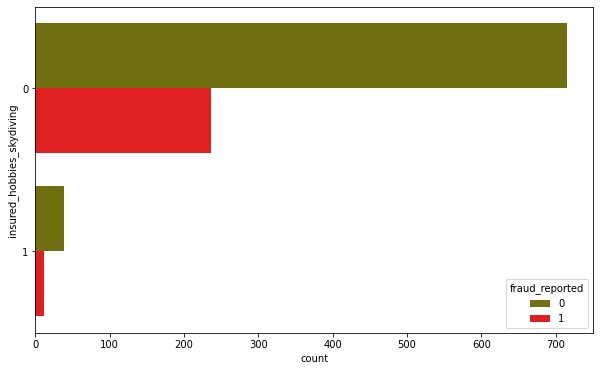

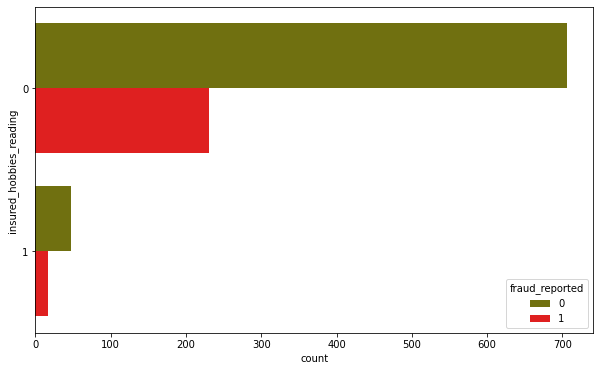

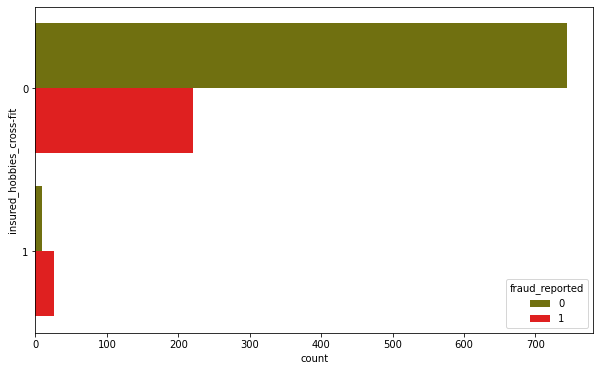

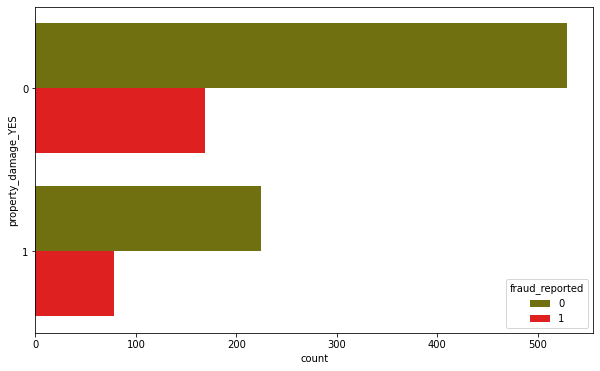

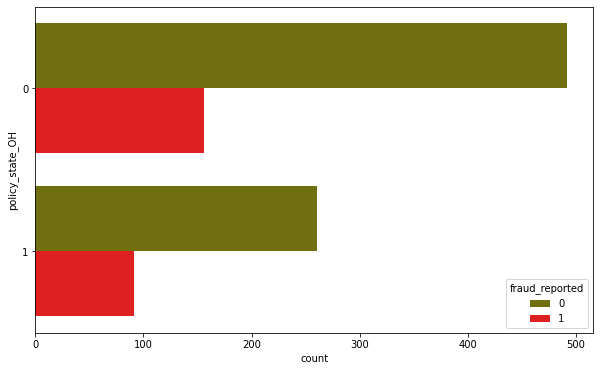

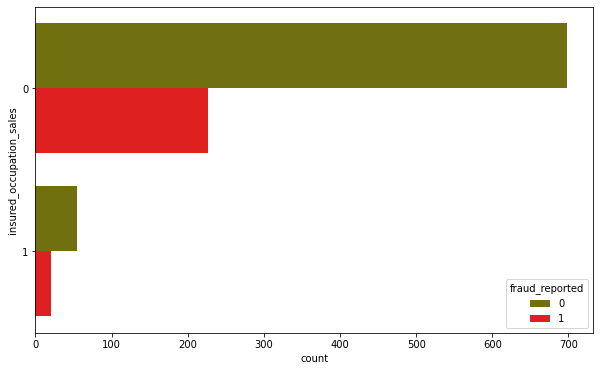

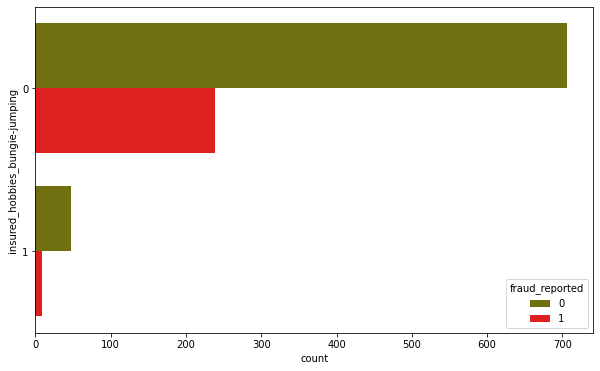

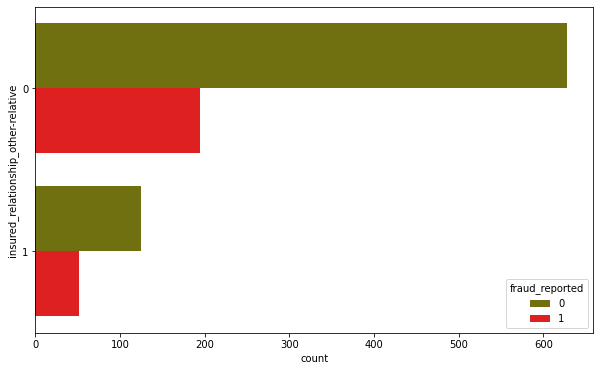

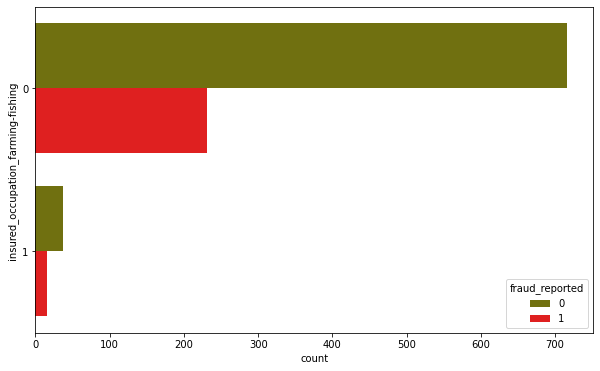

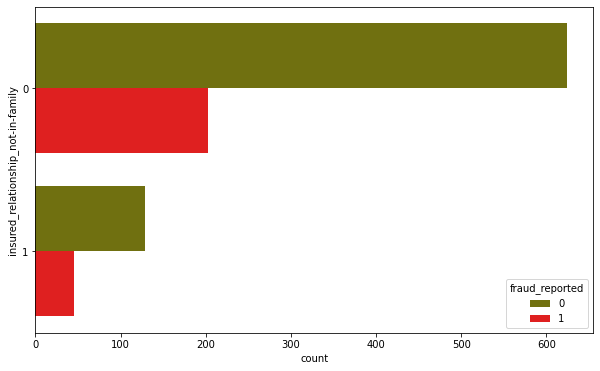

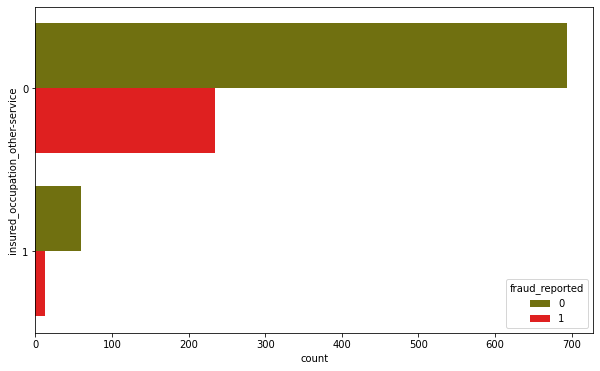

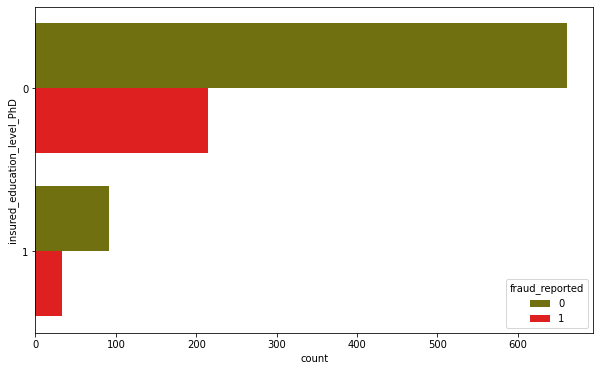

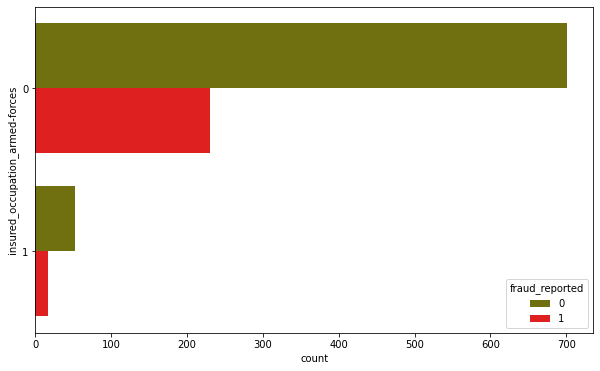

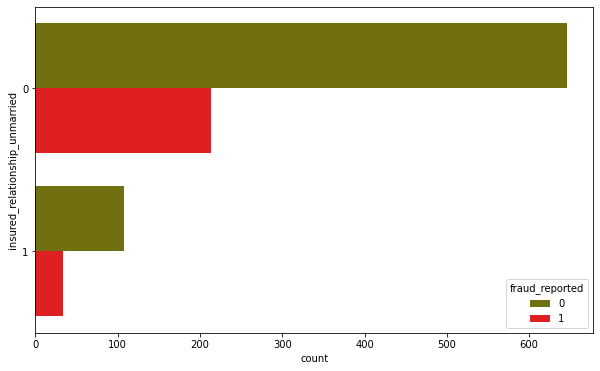

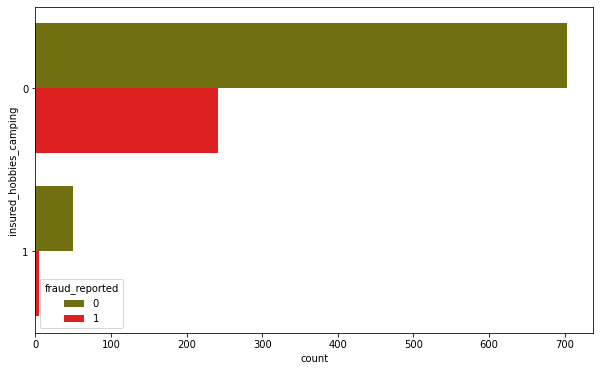

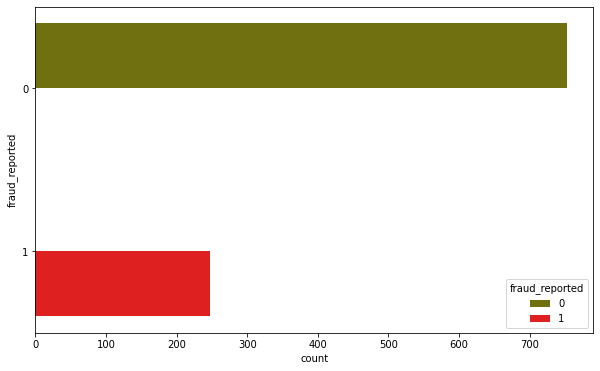

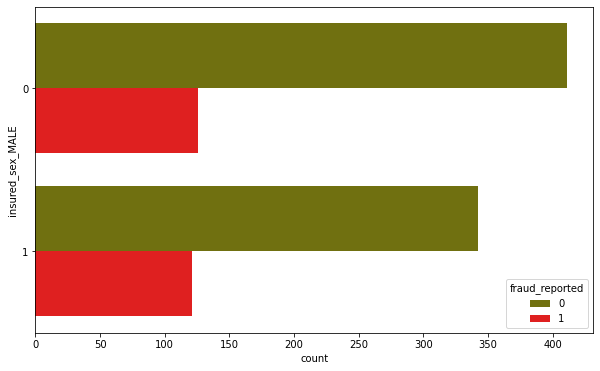

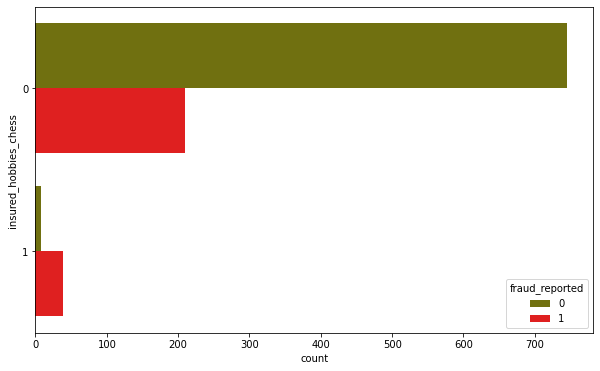

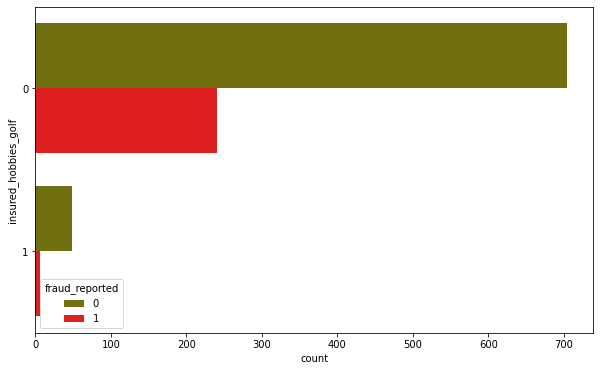

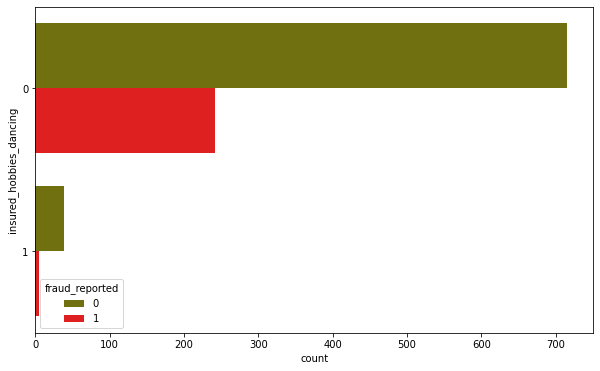

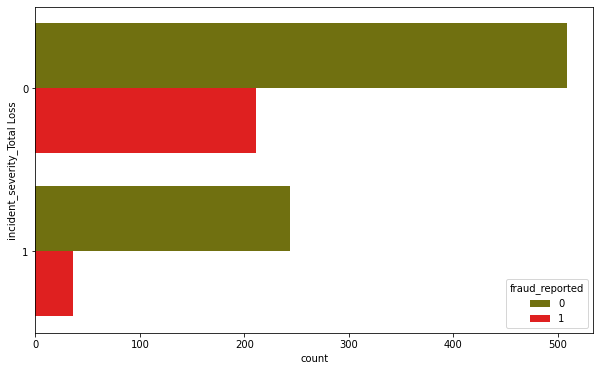

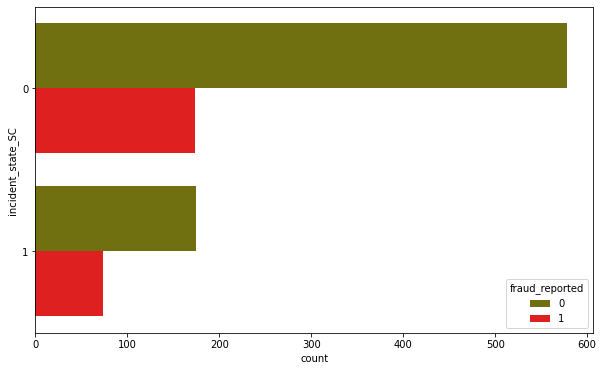

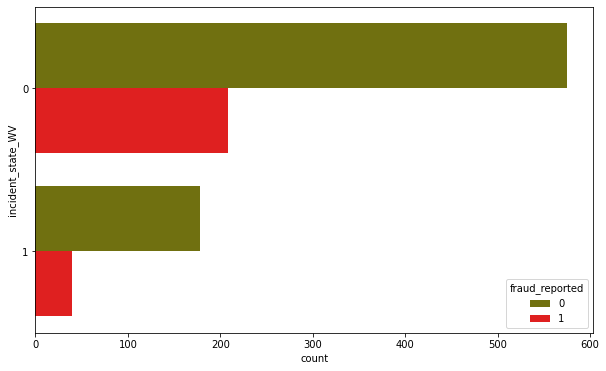

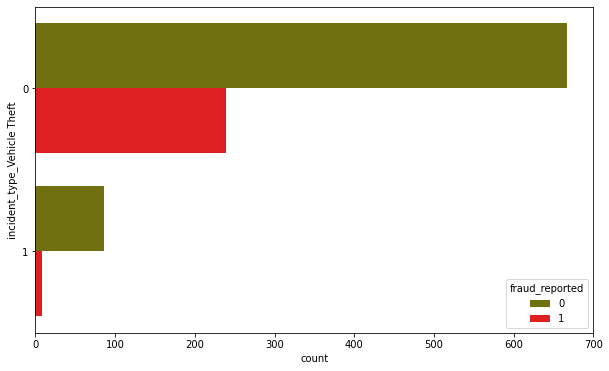

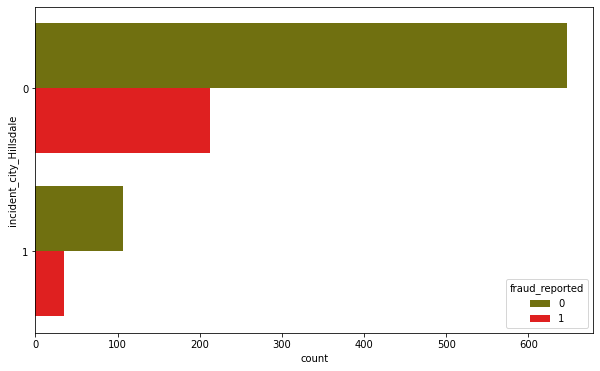

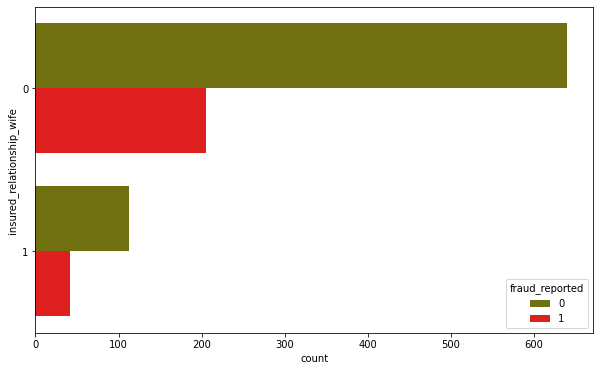

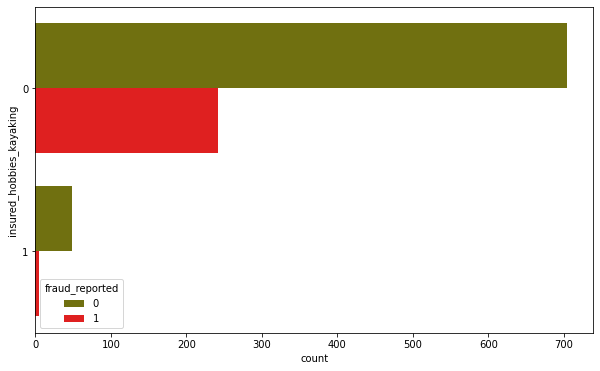

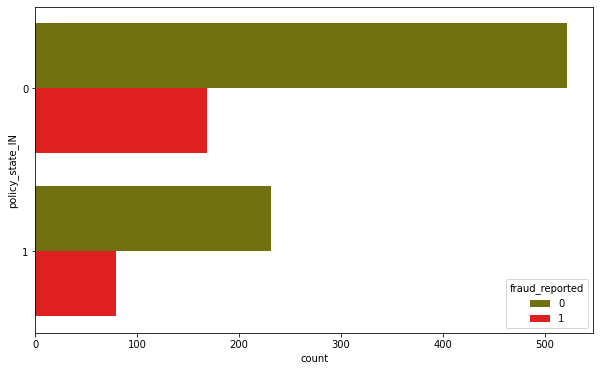

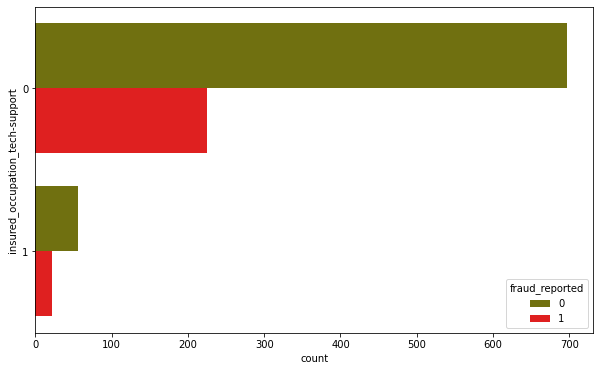

In [47]:
#each discrete variable and fraud reported distribution

for i, name in enumerate(df[nom_var]):
    plt.figure(i,figsize=(10,6))
    sns.countplot(y=name, data=df, hue="fraud_reported", palette=['olive','red'])

In [48]:
# Following is the information observed from above graphs:
# Rear collision has more number of fraud incidents
# exec-managarial occupation has conducted more fraudulent incidents
# property damage that is undocumented has more number of frauds
# insured sex doesn't impact frauds

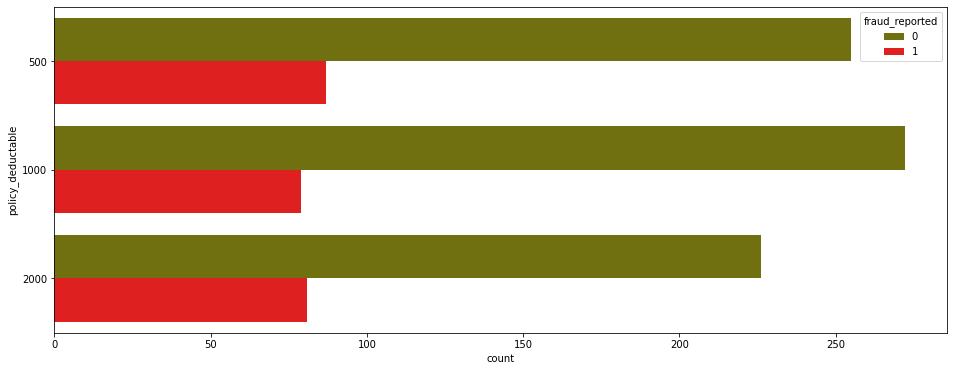

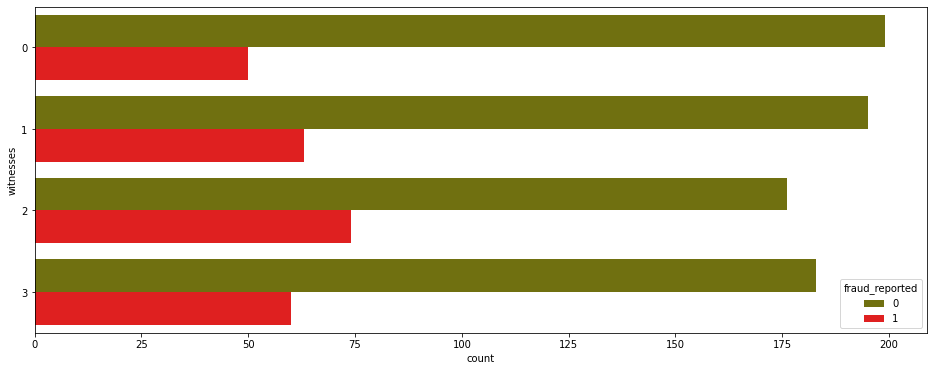

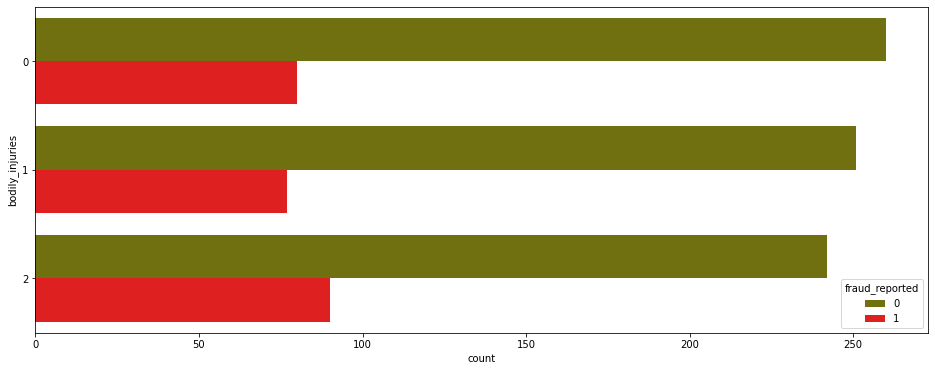

In [49]:
#each ordinal var and fraud reported's dist

for i, name in enumerate(df[ord_var]):
    plt.figure(i,figsize=(16,6))
    sns.countplot(data=df, y=name, hue='fraud_reported', palette=['olive','red'])

In [50]:
# Following is the information observed from above graphs:
# For incident severity 2 more number of frauds have occured

<Figure size 1152x432 with 0 Axes>

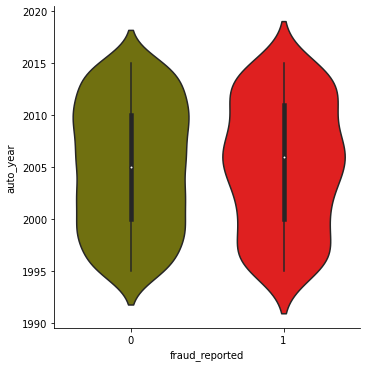

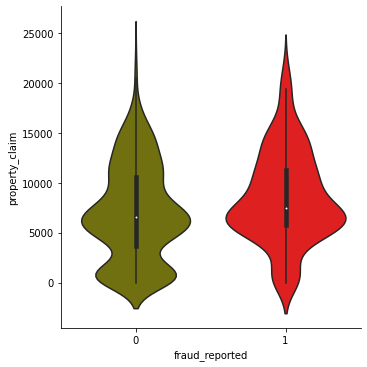

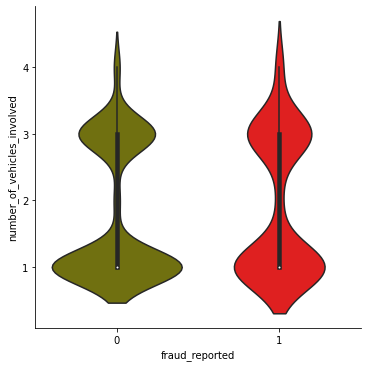

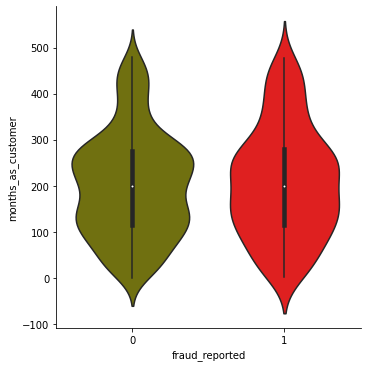

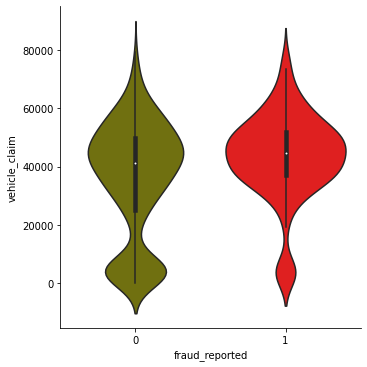

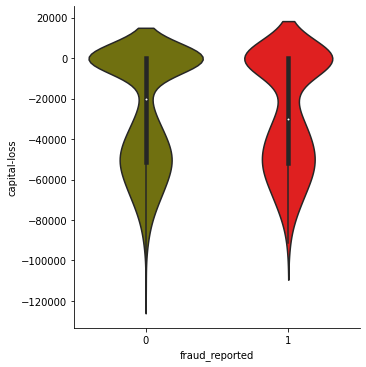

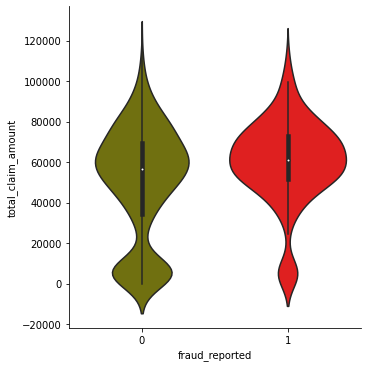

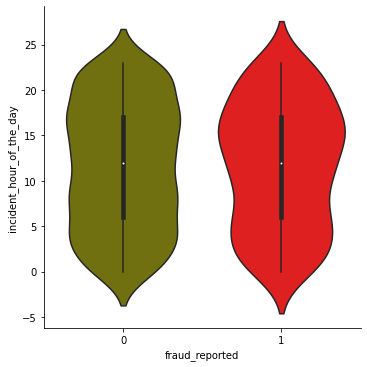

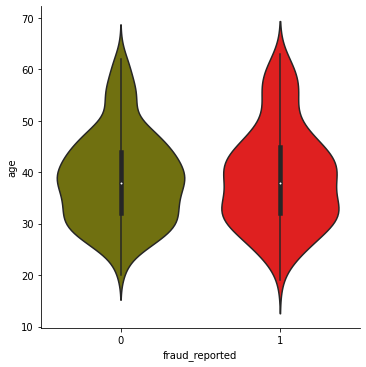

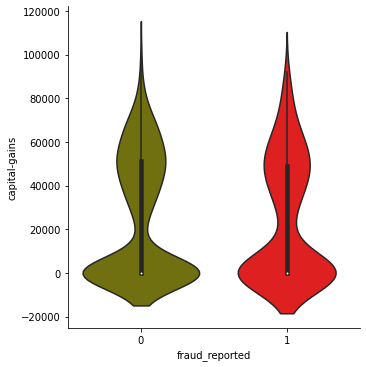

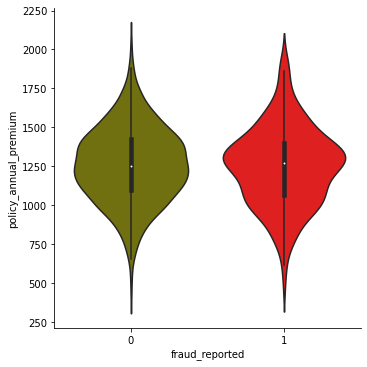

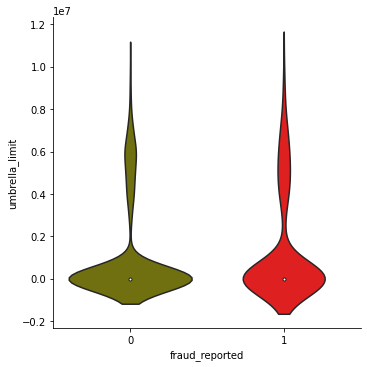

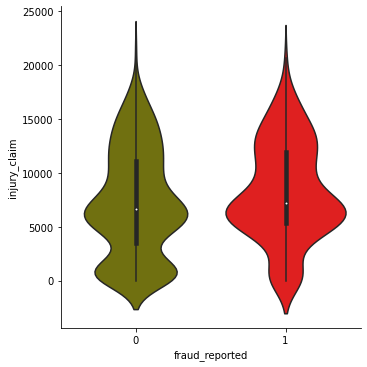

In [51]:
#each continous variable and fraud reported distribution

for i, name in enumerate(df[quan_var]):
    plt.figure(i,figsize=(16,6))
    sns.catplot(data=df, x="fraud_reported", y=name, kind='violin', palette=['olive','red'])

In [52]:
# Following is the information observed from above graphs:
# Vehicle claim amount is more in the range between 40000 to 50000 for fradulent claims

In [53]:
df.head()

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,...,incident_city_Columbus,incident_city_Hillsdale,incident_city_Northbend,incident_city_Northbrook,incident_city_Riverwood,incident_city_Springfield,property_damage_YES,property_damage_unknown,police_report_available_YES,police_report_available_unknown
0,328,48,1000,1406.91,0,53300,0,5,1,1,...,1,0,0,0,0,0,1,0,1,0
1,228,42,2000,1197.22,5000000,0,0,8,1,0,...,0,0,0,0,1,0,0,1,0,1
2,134,29,2000,1413.14,5000000,35100,0,7,3,2,...,1,0,0,0,0,0,0,0,0,0
3,256,41,2000,1415.74,6000000,48900,-62400,5,1,1,...,0,0,0,0,0,0,0,1,0,0
4,228,44,1000,1583.91,6000000,66000,-46000,20,1,0,...,0,0,0,0,0,0,0,0,0,0


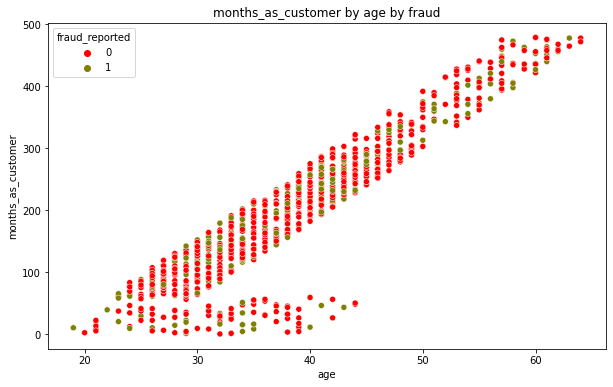

In [54]:
# no clear pattern between months as customer to age and to fraud.
# a group of people across age from 20-40 are relatively new insurance customers

plt.figure(figsize=(10, 6))

sns.scatterplot(x="age", y="months_as_customer", 
            hue="fraud_reported", data=df,
            palette=['red','olive'])

plt.title("months_as_customer by age by fraud");

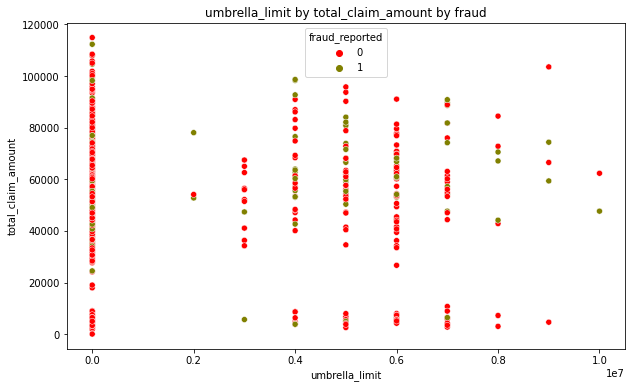

In [55]:
#seems like if there is no umbrella limit then more fraud can occur. 
#this people may have little to lose which is why they dont purchase umbrella 
#inversely, those who purchase have a lot of asset and a lot to lose so may be less prone to fraud?

plt.figure(figsize=(10, 6))

sns.scatterplot(x="umbrella_limit", y="total_claim_amount", 
            hue="fraud_reported", data=df,
            palette=['red','olive'])

plt.title("umbrella_limit by total_claim_amount by fraud");

### Model Training

In [13]:
def label_prediction(model, X_test):
    predicted_values = model.predict(X_test)
    return predicted_values

In [14]:
def calculate_metrics(model, X_train, X_test, Y_test, y_train):
    predicted_y_test = label_prediction(model, X_test)
    training_accuracy = accuracy_score(y_train, label_prediction(model,X_train))
    testing_accuracy = accuracy_score(Y_test, predicted_y_test)
    conf_matrix = confusion_matrix(Y_test, predicted_y_test)
    cls_report = classification_report(Y_test, predicted_y_test)
    mathews_coef = matthews_corrcoef(Y_test,predicted_y_test)
    return training_accuracy, testing_accuracy, conf_matrix,cls_report, mathews_coef
     
    

In [15]:
def model_statictics(model_conf_matrix):
    a = model_conf_matrix[0][0]
    b = model_conf_matrix[1][0]
    c = model_conf_matrix[0][1]
    d = model_conf_matrix[1][1]
    p1 = a + b
    p2 = a + c
    q1 = c + d
    q2 = b + d
    k = [2* (a*d - b*c) / (p1*q2 +p2*q1)]
    sensitivity = a / (a+ c)
    specificity = 1- (b / (b+d))
    return k, specificity, sensitivity
    
        
    

In [16]:
def print_metrics(model_metrics, model_name,model_statictics):
    print(f"Training Accuracy of {model_name} is {round(model_metrics[0]* 100,3)}%")
    print(f"Testing Accuracy of {model_name} is {round(model_metrics[1] * 100,3)}%")
    print(f"Confusion matrix of {model_name} is\n {model_metrics[2]}")
    print("\n")
    print("############################################################")
    print(f"Classification report for {model_name} is \n {model_metrics[3]}")
    print("############################################################")
    print("\n")
    print(f"Cohen Kappa Score for {model_name} is {model_statictics[0]}")
    print(f"Sensitivity for {model_name} is {model_statictics[2]}")
    print(f"Specificity for {model_name} is {model_statictics[1]}")
    print(f"Mathew's Coefficient for {model_name} is {model_metrics[4]}")

## Basic Models without any tunning

In [20]:
X_train,X_test,y_train,y_test=train_test_split(X_scal, y, test_size=0.2,stratify=y, random_state=20)


#### SVM

In [21]:

svc = SVC(C=1.0,kernel='linear')
svm_model = svc.fit(X_train, y_train)
label_prediction(svm_model, X_test )
svm_metrics = calculate_metrics(svm_model, X_train, X_test, y_test, y_train)
svm_statistics = model_statictics(svm_metrics[2])
print_metrics(svm_metrics, 'SVM',svm_statistics )

Training Accuracy of SVM is 89.75%
Testing Accuracy of SVM is 83.0%
Confusion matrix of SVM is
 [[132  19]
 [ 15  34]]


############################################################
Classification report for SVM is 
               precision    recall  f1-score   support

           0       0.90      0.87      0.89       151
           1       0.64      0.69      0.67        49

    accuracy                           0.83       200
   macro avg       0.77      0.78      0.78       200
weighted avg       0.84      0.83      0.83       200

############################################################


Cohen Kappa Score for SVM is [0.5528081020649743]
Sensitivity for SVM is 0.8741721854304636
Specificity for SVM is 0.6938775510204082
Mathew's Coefficient for SVM is 0.553574752017733


#### KNN

In [22]:
knn = KNeighborsClassifier(n_neighbors = 29)
knn_model = knn.fit(X_train, y_train)
label_prediction(knn_model, X_test )
knn_metrics = calculate_metrics(knn_model, X_train, X_test, y_test, y_train)
knn_statistics = model_statictics(knn_metrics[2])
print_metrics(knn_metrics, 'KNN',knn_statistics )


Training Accuracy of KNN is 77.875%
Testing Accuracy of KNN is 76.5%
Confusion matrix of KNN is
 [[149   2]
 [ 45   4]]


############################################################
Classification report for KNN is 
               precision    recall  f1-score   support

           0       0.77      0.99      0.86       151
           1       0.67      0.08      0.15        49

    accuracy                           0.77       200
   macro avg       0.72      0.53      0.50       200
weighted avg       0.74      0.77      0.69       200

############################################################


Cohen Kappa Score for KNN is [0.09719554360353438]
Sensitivity for KNN is 0.9867549668874173
Specificity for KNN is 0.08163265306122447
Mathew's Coefficient for KNN is 0.1724199492877261


### Decision Tree

In [23]:
dt_model = DecisionTreeClassifier(criterion='entropy')
dt_model=dt_model.fit(X_train, y_train)
label_prediction(dt_model, X_test )
dt_metrics = calculate_metrics(dt_model, X_train, X_test, y_test, y_train)
dt_statistics = model_statictics(dt_metrics[2])
print_metrics(dt_metrics, 'dt_model',dt_statistics )

Training Accuracy of dt_model is 100.0%
Testing Accuracy of dt_model is 79.0%
Confusion matrix of dt_model is
 [[123  28]
 [ 14  35]]


############################################################
Classification report for dt_model is 
               precision    recall  f1-score   support

           0       0.90      0.81      0.85       151
           1       0.56      0.71      0.63        49

    accuracy                           0.79       200
   macro avg       0.73      0.76      0.74       200
weighted avg       0.81      0.79      0.80       200

############################################################


Cohen Kappa Score for dt_model is [0.4823123382226057]
Sensitivity for dt_model is 0.8145695364238411
Specificity for dt_model is 0.7142857142857143
Mathew's Coefficient for dt_model is 0.48965791156084604


In [24]:
rand_clf = RandomForestClassifier(criterion= 'entropy', max_depth= 12, max_features= 'sqrt', min_samples_leaf= 1, min_samples_split= 2, n_estimators= 100)
rand_clf=rand_clf.fit(X_train, y_train)
y_pred = rand_clf.predict(X_test)
label_prediction(rand_clf, X_test )
randforest_metrics = calculate_metrics(rand_clf, X_train, X_test, y_test, y_train)
rand_statistics = model_statictics(randforest_metrics[2])
print_metrics(randforest_metrics, 'Random Forest Tree',rand_statistics )

Training Accuracy of Random Forest Tree is 99.625%
Testing Accuracy of Random Forest Tree is 79.5%
Confusion matrix of Random Forest Tree is
 [[147   4]
 [ 37  12]]


############################################################
Classification report for Random Forest Tree is 
               precision    recall  f1-score   support

           0       0.80      0.97      0.88       151
           1       0.75      0.24      0.37        49

    accuracy                           0.80       200
   macro avg       0.77      0.61      0.62       200
weighted avg       0.79      0.80      0.75       200

############################################################


Cohen Kappa Score for Random Forest Tree is [0.2827151854443667]
Sensitivity for Random Forest Tree is 0.9735099337748344
Specificity for Random Forest Tree is 0.24489795918367352
Mathew's Coefficient for Random Forest Tree is 0.3462469368002103


### XGBOOST

In [25]:
from xgboost import XGBClassifier
xg_clf = XGBClassifier(booster='gbtree', n_jobs=-1)
xg_clf=xg_clf.fit(X_train, y_train)
y_pred = xg_clf.predict(X_test)
label_prediction(xg_clf, X_test )
xg_metrics = calculate_metrics(xg_clf, X_train, X_test, y_test, y_train)
xg_statistics = model_statictics(xg_metrics[2])
print_metrics(xg_metrics, 'XGBOOST',xg_statistics )

[11:26:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Training Accuracy of XGBOOST is 100.0%
Testing Accuracy of XGBOOST is 79.5%
Confusion matrix of XGBOOST is
 [[133  18]
 [ 23  26]]


############################################################
Classification report for XGBOOST is 
               precision    recall  f1-score   support

           0       0.85      0.88      0.87       151
           1       0.59      0.53      0.56        49

    accuracy                           0.80       200
   macro avg       0.72      0.71      0.71       200
weighted avg       0.79      0.80      0.79       200

############################################################


Cohen Kappa Score for XGBOOST is [0.42609182530795076]
Sensitivity 

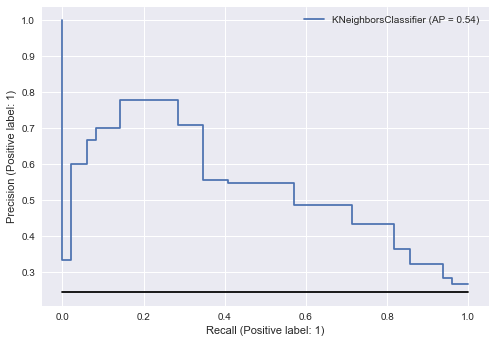

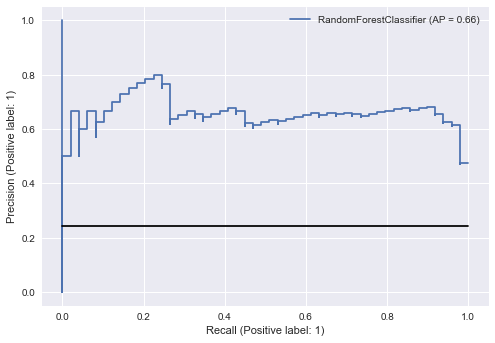

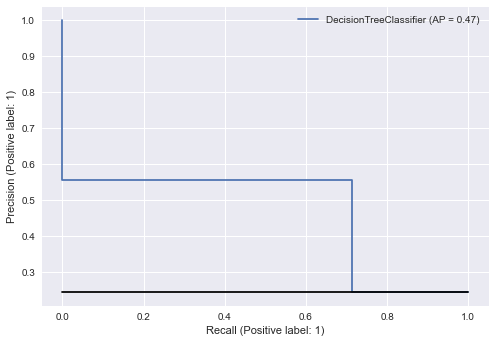

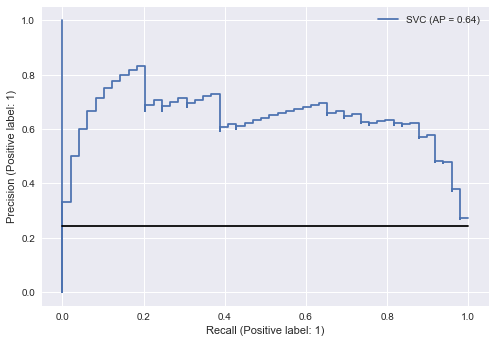

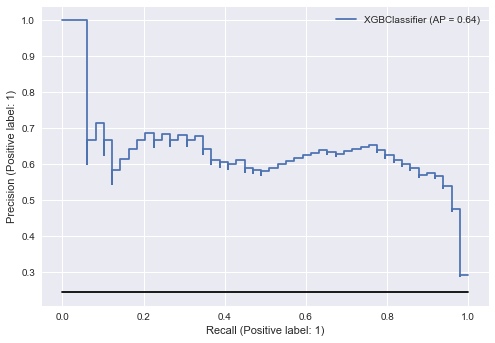

In [26]:

y_test.value_counts()
baseline_prc = y_test.value_counts()[1]/ (y_test.value_counts()[0]+y_test.value_counts()[1])
for i in [knn_model,rand_clf,dt_model,svm_model,xg_clf]:
    plt.style.use('seaborn')
    plot_precision_recall_curve(i, X_test, y_test)
    plt.plot([0,1],[baseline_prc,baseline_prc],c='k')
    plt.legend(loc="best")
    plt.show()
#plot_precision_recall_curve(rand_tuned, X_test, y_test)
#plot_precision_recall_curve(knn_tuned, X_test, y_test)
#plot_precision_recall_curve(knn_tuned, X_test, y_test)
#plt.plot([0,1],[baseline_prc,baseline_prc],c='k')
#plt.legend(loc="best")
#plt.show()
#baseline for this is fraction of positive cases in dataset

In [17]:
def calculate_roc_auc(model, X_test,y_test):
    predict_prob = model.predict_proba(X_test)
    FPR, TPR, Threshold = roc_curve(y_test, predict_prob[:,1], pos_label=1)
    model_auc_score = roc_auc_score(y_test, predict_prob[:,1])
    return FPR, TPR, Threshold, model_auc_score
    

In [18]:
def calculate_PRC(model, X_test,y_test):
    predict_prob = model.predict_proba(X_test)
    precision,recall, _ = precision_recall_curve(y_test, predict_prob[:,1])
    return precision, recall,_

In [19]:

y_pred_svm = svm_model.decision_function(X_test)
svm_fpr,svm_tpr, svm_threshold = roc_curve(y_test, y_pred_svm)
auc_svm = auc(svm_fpr, svm_tpr)


NameError: name 'svm_model' is not defined

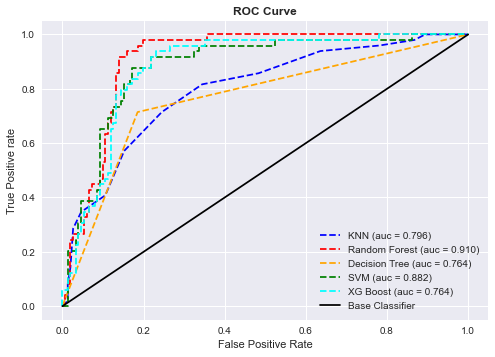

In [30]:
plt.style.use('seaborn')
FPR_knn, TPR_knn, Threshold_knn, model_auc_score_knn = calculate_roc_auc(knn_model,X_test,y_test)
plt.plot(FPR_knn, TPR_knn, linestyle='--',color='blue', label='KNN (auc = %0.3f)'% model_auc_score_knn )
FPR_rand, TPR_rand, Threshold_rand, model_auc_score_rand = calculate_roc_auc(rand_clf,X_test,y_test)
plt.plot(FPR_rand, TPR_rand, linestyle='--',color='red', label='Random Forest (auc = %0.3f)'% model_auc_score_rand)
FPR_dtc, TPR_dtc, Threshold_dtc, model_auc_score_dtc = calculate_roc_auc(dt_model,X_test,y_test)
plt.plot(FPR_dtc, TPR_dtc, linestyle='--',color='orange', label='Decision Tree (auc = %0.3f)'% model_auc_score_dtc)
plt.plot(svm_fpr, svm_tpr, linestyle='--',color='green',label='SVM (auc = %0.3f)' % auc_svm)
FPR_xg, TPR_xg, Threshold_xg, model_auc_score_xg = calculate_roc_auc(xg_clf,X_test,y_test)
plt.plot(FPR_xg, TPR_xg, linestyle='--',color='cyan', label='XG Boost (auc = %0.3f)'% model_auc_score_dtc)
#Xg_clf
plt.plot([0,1],[0,1],c='k',label='Base Classifier') # baseline classifier
plt.title('ROC Curve',fontweight='bold')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')   
plt.savefig('ROC',dpi=300)
plt.show()

In [31]:
# As dataset is imbalanced we can see Specificity obtained is very low , also Precision and Recall for minority class is less
# Cohen Kappa Score obtained is also below 50%

## Handing Imbalanced dataset using SMOTE

In [32]:
## We will be using SMOTE (Synthetic Minority Over Sampling Technique) to handle imbalance dataset

In [20]:
X_balanced , Y_balanced = SMOTE().fit_resample(X, y)

print(X_balanced.shape)
print(Y_balanced.shape)

(1506, 89)
(1506,)


In [34]:
Y_balanced.value_counts()

1    753
0    753
Name: fraud_reported, dtype: int64

In [21]:
## scaling down all input values to follow standard normal distribution using standardscaler method
scaling_obj=StandardScaler()
X_scaled = scaling_obj.fit_transform(X_balanced)

In [22]:

X_train,X_test,y_train,y_test=train_test_split(X_scaled,Y_balanced,test_size=0.2, stratify=Y_balanced,random_state=20)

### SVM Model After SMOTE

In [39]:
svc = SVC(kernel='linear')
svm_model = svc.fit(X_train, y_train)
label_prediction(svm_model, X_test )
svm_metrics = calculate_metrics(svm_model, X_train, X_test, y_test, y_train)
svm_statistics = model_statictics(svm_metrics[2])
print_metrics(svm_metrics, 'SVM',svm_statistics )

Training Accuracy of SVM is 92.359%
Testing Accuracy of SVM is 89.073%
Confusion matrix of SVM is
 [[133  18]
 [ 15 136]]


############################################################
Classification report for SVM is 
               precision    recall  f1-score   support

           0       0.90      0.88      0.89       151
           1       0.88      0.90      0.89       151

    accuracy                           0.89       302
   macro avg       0.89      0.89      0.89       302
weighted avg       0.89      0.89      0.89       302

############################################################


Cohen Kappa Score for SVM is [0.7814569536423841]
Sensitivity for SVM is 0.8807947019867549
Specificity for SVM is 0.9006622516556292
Mathew's Coefficient for SVM is 0.7816112274757259


### KNN Model After SMOTE

In [40]:
knn = KNeighborsClassifier(n_neighbors = 29)
knn_model = knn.fit(X_train, y_train)
label_prediction(knn_model, X_test )
knn_metrics = calculate_metrics(knn_model, X_train, X_test, y_test, y_train)
knn_statistics = model_statictics(knn_metrics[2])
print_metrics(knn_metrics, 'KNN',knn_statistics )

Training Accuracy of KNN is 50.166%
Testing Accuracy of KNN is 50.0%
Confusion matrix of KNN is
 [[  0 151]
 [  0 151]]


############################################################
Classification report for KNN is 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       151
           1       0.50      1.00      0.67       151

    accuracy                           0.50       302
   macro avg       0.25      0.50      0.33       302
weighted avg       0.25      0.50      0.33       302

############################################################


Cohen Kappa Score for KNN is [0.0]
Sensitivity for KNN is 0.0
Specificity for KNN is 1.0
Mathew's Coefficient for KNN is 0.0


### Decision Tree After SMOTE

In [41]:
dt_model = DecisionTreeClassifier()
dt_model=dt_model.fit(X_train, y_train)
label_prediction(dt_model, X_test )
dt_metrics = calculate_metrics(dt_model, X_train, X_test, y_test, y_train)
dt_statistics = model_statictics(dt_metrics[2])
print_metrics(dt_metrics, 'dt_model',dt_statistics )


Training Accuracy of dt_model is 100.0%
Testing Accuracy of dt_model is 85.43%
Confusion matrix of dt_model is
 [[128  23]
 [ 21 130]]


############################################################
Classification report for dt_model is 
               precision    recall  f1-score   support

           0       0.86      0.85      0.85       151
           1       0.85      0.86      0.86       151

    accuracy                           0.85       302
   macro avg       0.85      0.85      0.85       302
weighted avg       0.85      0.85      0.85       302

############################################################


Cohen Kappa Score for dt_model is [0.7086092715231788]
Sensitivity for dt_model is 0.847682119205298
Specificity for dt_model is 0.8609271523178808
Mathew's Coefficient for dt_model is 0.7086714356843233


### Random Forest Classifier

In [42]:
rand_clf = RandomForestClassifier(criterion= 'entropy', max_depth= 12, max_features= 'sqrt', min_samples_leaf= 1, min_samples_split= 2, n_estimators= 100)
rand_clf=rand_clf.fit(X_train, y_train)
#y_pred = rand_clf.predict(X_test)
label_prediction(rand_clf, X_test )
randforest_metrics = calculate_metrics(rand_clf, X_train, X_test, y_test, y_train)
rand_statistics = model_statictics(randforest_metrics[2])
print_metrics(randforest_metrics, 'Random Forest Tree',rand_statistics )

Training Accuracy of Random Forest Tree is 99.834%
Testing Accuracy of Random Forest Tree is 85.43%
Confusion matrix of Random Forest Tree is
 [[134  17]
 [ 27 124]]


############################################################
Classification report for Random Forest Tree is 
               precision    recall  f1-score   support

           0       0.83      0.89      0.86       151
           1       0.88      0.82      0.85       151

    accuracy                           0.85       302
   macro avg       0.86      0.85      0.85       302
weighted avg       0.86      0.85      0.85       302

############################################################


Cohen Kappa Score for Random Forest Tree is [0.7086092715231788]
Sensitivity for Random Forest Tree is 0.8874172185430463
Specificity for Random Forest Tree is 0.8211920529801324
Mathew's Coefficient for Random Forest Tree is 0.7101683011106473


In [43]:
xg_clf = XGBClassifier(booster='gbtree', n_jobs=-1)
xg_clf=xg_clf.fit(X_train, y_train)
y_pred = xg_clf.predict(X_test)
label_prediction(xg_clf, X_test )
xg_metrics = calculate_metrics(xg_clf, X_train, X_test, y_test, y_train)
xg_statistics = model_statictics(xg_metrics[2])
print_metrics(xg_metrics, 'XGBOOST',xg_statistics )

[11:29:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Training Accuracy of XGBOOST is 100.0%
Testing Accuracy of XGBOOST is 88.742%
Confusion matrix of XGBOOST is
 [[133  18]
 [ 16 135]]


############################################################
Classification report for XGBOOST is 
               precision    recall  f1-score   support

           0       0.89      0.88      0.89       151
           1       0.88      0.89      0.89       151

    accuracy                           0.89       302
   macro avg       0.89      0.89      0.89       302
weighted avg       0.89      0.89      0.89       302

############################################################


Cohen Kappa Score for XGBOOST is [0.7748344370860927]
Sensitivity

In [44]:
## After SMOTE Kohen Kapaa score is improved

## Principle Component Analysis

In [123]:
### As we have many features , we can reduce by using principle component analysis

In [ ]:
pca=PCA(n_components=0.95)
X_reduced = pca.fit_transform(X_scaled)

In [ ]:
X_reduced.shape

In [ ]:
var_ratio = pca.explained_variance_ratio_

In [ ]:
np.sum(var_ratio)

In [ ]:
len(var_ratio)

90 features are converted into 72 principal components which constitutes 95.02% variance.

The explained variance tells how much information (variance) can be attributed to each of the principal components

## Hypertunning Using RandomSearch CV

In [23]:
X_train,X_test,y_train,y_test=train_test_split(X_scaled,Y_balanced,test_size=0.2,stratify=Y_balanced,random_state=20)

### SVM Parameters Hypertunning

**Default SVC parameters**
SVC(
    *,
    C=1.0,
    kernel='rbf',
    degree=3,
    gamma='scale',
    coef0=0.0,
    shrinking=True,
    probability=False,
    tol=0.001,
    cache_size=200,
    class_weight=None,
    verbose=False,
    max_iter=-1,
    decision_function_shape='ovr',
    break_ties=False,
    random_state=None,
)


In [46]:
svc_tune=SVC()

In [226]:
import time
start = time.process_time()
svm_parameters = [{'C': [1,10,50,100,200,300],'kernel': ['linear']},
                  {'C': [1,10,50,100,200,300],'kernel': ['rbf'], 'gamma':[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}]

    
rs_svm = RandomizedSearchCV(svc_tune, svm_parameters, cv=10, n_jobs = -1, random_state=42)
rs_svm.fit(X_train, y_train)
print(rs_svm.best_params_)
print(time.process_time() - start)


{'kernel': 'linear', 'C': 1}
1.796875


In [126]:
#For SVM best hyperparameters are linear and C=1 , which we have already used 

In [47]:
svc_tuned = SVC(C=1, kernel='linear')

In [50]:
import time
start = time.process_time()
svc_tuned = svc_tuned.fit(X_train, y_train)
print(time.process_time() - start)
label_prediction(svc_tuned, X_test )
svm_metrics = calculate_metrics(svc_tuned, X_train, X_test, y_test, y_train)
svm_statistics = model_statictics(svm_metrics[2])
print_metrics(svm_metrics, 'SVM',svm_statistics )


0.296875
Training Accuracy of SVM is 92.359%
Testing Accuracy of SVM is 89.073%
Confusion matrix of SVM is
 [[133  18]
 [ 15 136]]


############################################################
Classification report for SVM is 
               precision    recall  f1-score   support

           0       0.90      0.88      0.89       151
           1       0.88      0.90      0.89       151

    accuracy                           0.89       302
   macro avg       0.89      0.89      0.89       302
weighted avg       0.89      0.89      0.89       302

############################################################


Cohen Kappa Score for SVM is [0.7814569536423841]
Sensitivity for SVM is 0.8807947019867549
Specificity for SVM is 0.9006622516556292
Mathew's Coefficient for SVM is 0.7816112274757259


### KNN Parameters Hypertunning

**Default hyperparameters of KNN**
KNeighborsClassifier(
    n_neighbors=5,
    *,
    weights='uniform',
    algorithm='auto',
    leaf_size=30,
    p=2,
    metric='minkowski',
    metric_params=None,
    n_jobs=None,
    **kwargs,
)

In [49]:
from sklearn.pipeline import Pipeline
import time
start = time.process_time()
knn_pipe = Pipeline([
   ("knn", KNeighborsClassifier(n_jobs=-1))])

knn_parameters = {'knn__n_neighbors':[7,17,23,25,27,29,31],
              'knn__weights':['uniform', 'distance'],
              'knn__metric':['minkowski','euclidean','manhattan'],
              'knn__algorithm':['auto', 'ball_tree','kd_tree','brute'],
              'knn__leaf_size':[1,2,3,4,5,6,7,8,9,10]
             }

    
rs_knn2 = RandomizedSearchCV(knn_pipe, knn_parameters, cv=10, n_jobs = -1, random_state=42)
rs_knn2.fit(X_train, y_train)
print(rs_knn2.best_params_)
print(time.process_time() - start)

{'knn__weights': 'uniform', 'knn__n_neighbors': 7, 'knn__metric': 'minkowski', 'knn__leaf_size': 10, 'knn__algorithm': 'brute'}
1.203125


In [51]:
start = time.process_time()
knn_tuned = KNeighborsClassifier(n_neighbors = 7,weights='uniform',metric='minkowski',leaf_size=10, algorithm='brute' )

knn_tuned.fit(X_train, y_train)
print(time.process_time() - start)

0.015625


In [52]:
label_prediction(knn_tuned, X_test )
knn_metrics = calculate_metrics(knn_tuned, X_train, X_test, y_test, y_train)
knn_statistics = model_statictics(knn_metrics[2])
print("***********KNN Algorithms Metrics After Hypertunning***********")
print("\n")
print_metrics(knn_metrics, 'KNN',knn_statistics )

***********KNN Algorithms Metrics After Hypertunning***********


Training Accuracy of KNN is 62.375%
Testing Accuracy of KNN is 53.311%
Confusion matrix of KNN is
 [[ 11 140]
 [  1 150]]


############################################################
Classification report for KNN is 
               precision    recall  f1-score   support

           0       0.92      0.07      0.13       151
           1       0.52      0.99      0.68       151

    accuracy                           0.53       302
   macro avg       0.72      0.53      0.41       302
weighted avg       0.72      0.53      0.41       302

############################################################


Cohen Kappa Score for KNN is [0.06622516556291391]
Sensitivity for KNN is 0.0728476821192053
Specificity for KNN is 0.9933774834437086
Mathew's Coefficient for KNN is 0.16951587590520262


### Decsion Tree Hypertunning

In [179]:
start = time.process_time()
dt_tune = DecisionTreeClassifier()
rv_params = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [3, 5, 7, 10],
    'min_samples_split' : range(2, 10, 1),
    'min_samples_leaf' : range(2, 10, 1)
}

rs_search = RandomizedSearchCV(dt_tune, rv_params, cv = 10, n_jobs = -1, verbose = 1)
rs_search.fit(X_train, y_train)
print(time.process_time() - start)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
0.671875


In [53]:
# best parameters and best score

print(rs_search.best_params_)
print(rs_search.best_score_)

NameError: name 'rs_search' is not defined

#### Default Parameters
DecisionTreeClassifier(
    *,
    criterion='gini',
    splitter='best',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    random_state=None,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    min_impurity_split=None,
    class_weight=None,
    ccp_alpha=0.0,
)

In [54]:
# best estimator 
start = time.process_time()
dtc_tuned = DecisionTreeClassifier(criterion='gini',max_depth=3,min_samples_split=4, min_samples_leaf=2)
dtc_tuned.fit(X_train, y_train)
print(time.process_time() - start)
label_prediction(dtc_tuned, X_test )
dtc_metrics = calculate_metrics(dtc_tuned, X_train, X_test, y_test, y_train)
dtc_statistics = model_statictics(dtc_metrics[2])
print_metrics(dtc_metrics,'Decision Tree',dtc_statistics )



0.015625
Training Accuracy of Decision Tree is 88.206%
Testing Accuracy of Decision Tree is 89.073%
Confusion matrix of Decision Tree is
 [[127  24]
 [  9 142]]


############################################################
Classification report for Decision Tree is 
               precision    recall  f1-score   support

           0       0.93      0.84      0.89       151
           1       0.86      0.94      0.90       151

    accuracy                           0.89       302
   macro avg       0.89      0.89      0.89       302
weighted avg       0.89      0.89      0.89       302

############################################################


Cohen Kappa Score for Decision Tree is [0.7814569536423841]
Sensitivity for Decision Tree is 0.8410596026490066
Specificity for Decision Tree is 0.9403973509933775
Mathew's Coefficient for Decision Tree is 0.7853414303958781


### Random Forest Classifier HyperTunning

In [141]:
start = time.process_time()
rand_clf = RandomForestClassifier(n_jobs=-1)

rand_params = {'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
               
             'min_samples_leaf': [1, 2, 3, 4, 5],
             'min_samples_split': [2, 5, 7, 9, 11],
             'max_features': ['auto', 'sqrt'],
             'n_estimators': [100, 150, 200, 250, 300, 350, 400, 450, 500],
             'class_weight':[{0:0.246667, 1:0.75333},None]
              }


    
rand_rs = RandomizedSearchCV(rand_clf, rand_params, cv=10, n_jobs = -1, random_state=42)
rand_rs.fit(X_train, y_train)
print(rand_rs.best_params_)
print(time.process_time() - start)

{'n_estimators': 450, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 20, 'class_weight': {0: 0.246667, 1: 0.75333}}
4.125


#### Default
RandomForestClassifier(
    n_estimators=100,
    *,
    criterion='gini',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features='auto',
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    min_impurity_split=None,
    bootstrap=True,
    oob_score=False,
    n_jobs=None,
    random_state=None,
    verbose=0,
    warm_start=False,
    class_weight=None,
    ccp_alpha=0.0,
    max_samples=None,
)

In [25]:
#rand_tuned = rand_rs.best_estimator_
start = time.process_time()
rand_tuned= RandomForestClassifier(n_estimators=450, max_depth=20, min_samples_split=5, min_samples_leaf=1,max_features='auto', class_weight={0: 0.246667, 1: 0.75333})
rand_tuned.fit(X_train, y_train)
print(time.process_time() - start)
#y_pred = rand_clf.predict(X_test)
label_prediction(rand_tuned, X_test )
randforest_metrics = calculate_metrics(rand_tuned, X_train, X_test, y_test, y_train)
rand_statistics = model_statictics(randforest_metrics[2])
print_metrics(randforest_metrics, 'Random Forest Tree', rand_statistics)


Training Accuracy of Random Forest Tree is 100.0%
Testing Accuracy of Random Forest Tree is 87.086%
Confusion matrix of Random Forest Tree is
 [[135  16]
 [ 23 128]]


############################################################
Classification report for Random Forest Tree is 
               precision    recall  f1-score   support

           0       0.85      0.89      0.87       151
           1       0.89      0.85      0.87       151

    accuracy                           0.87       302
   macro avg       0.87      0.87      0.87       302
weighted avg       0.87      0.87      0.87       302

############################################################


Cohen Kappa Score for Random Forest Tree is [0.7417218543046358]
Sensitivity for Random Forest Tree is 0.8940397350993378
Specificity for Random Forest Tree is 0.847682119205298
Mathew's Coefficient for Random Forest Tree is 0.742520131897348


In [143]:
## Accuracy and other parameters obtained by decision tree can be improved by using hyperparameter tunning

In [151]:

start = time.process_time()
xg = XGBClassifier(booster='gbtree', n_jobs=-1)

xg_values = {'max_depth': [3, 4, 5, 6],
             'eta': [0.05, 0.1, 0.15, 0.3],
             'reg_lambda': [0.01, 0.05, 0.1, 0.5, 1],
             'reg_alpha': [0.01, 0.05, 0.1, 0.5, 1],
             'gamma': [0, 1, 2, 3],
             'n_estimators': [150, 250, 350, 450, 500, 550, 600, 650],
             
              }


    
rs_xg3 = RandomizedSearchCV(xg, xg_values, cv=10, n_jobs = -1, random_state=42)
rs_xg3.fit(X_train, y_train)
#print(rs_xg3.best_params_)
print(time.process_time() - start)

[12:44:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
11.046875


In [33]:
#Xg_clf = rs_xg3.best_estimator_
start = time.process_time()
Xg_clf=XGBClassifier(reg_lambda=0.01,reg_alpha=0.05, n_estimators=450,max_depth=3,gamma=2, eta=0.3)
#Xg_clf=XGBClassifier(reg_lambda=0.5,reg_alpha=0.05, n_estimators=450,max_depth=3,gamma=2, eta=0.3)
Xg_clf = Xg_clf.fit(X_train, y_train)
print(time.process_time() - start)

#y_pred = rand_clf.predict(X_test)
label_prediction(Xg_clf, X_test )
XG_metrics = calculate_metrics(Xg_clf, X_train, X_test, y_test, y_train)
XG_statistics = model_statictics(XG_metrics[2])
print_metrics(randforest_metrics, 'XG Boost Classifier', XG_statistics)

[10:59:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
8.5625
Training Accuracy of XG Boost Classifier is 100.0%
Testing Accuracy of XG Boost Classifier is 87.086%
Confusion matrix of XG Boost Classifier is
 [[135  16]
 [ 23 128]]


############################################################
Classification report for XG Boost Classifier is 
               precision    recall  f1-score   support

           0       0.85      0.89      0.87       151
           1       0.89      0.85      0.87       151

    accuracy                           0.87       302
   macro avg       0.87      0.87      0.87       302
weighted avg       0.87      0.87      0.87       302

############################################################


Cohen Kapp

In [27]:
## Pickle file to store final model
import pickle

In [34]:
pkl_filename = "Group10_XGBoost_FraudDetection.pkl"
with open(pkl_filename, 'wb') as f:
    pickle.dump(Xg_clf, f)

In [37]:
with open(pkl_filename, 'rb') as f:
    pickled_xgboost_model = pickle.load(f)
pickled_xgboost_model

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eta=0.3, gamma=2, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=3, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=450, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0.05, reg_lambda=0.01, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [39]:
## metrics calculation using pickle file
label_prediction(pickled_xgboost_model, X_test )
XG_metrics = calculate_metrics(pickled_xgboost_model, X_train, X_test, y_test, y_train)
XG_statistics = model_statictics(XG_metrics[2])
print_metrics(randforest_metrics, 'XG Boost Classifier', XG_statistics)

Training Accuracy of XG Boost Classifier is 100.0%
Testing Accuracy of XG Boost Classifier is 87.086%
Confusion matrix of XG Boost Classifier is
 [[135  16]
 [ 23 128]]


############################################################
Classification report for XG Boost Classifier is 
               precision    recall  f1-score   support

           0       0.85      0.89      0.87       151
           1       0.89      0.85      0.87       151

    accuracy                           0.87       302
   macro avg       0.87      0.87      0.87       302
weighted avg       0.87      0.87      0.87       302

############################################################


Cohen Kappa Score for XG Boost Classifier is [0.8013245033112583]
Sensitivity for XG Boost Classifier is 0.8807947019867549
Specificity for XG Boost Classifier is 0.9205298013245033
Mathew's Coefficient for XG Boost Classifier is 0.742520131897348


In [57]:
XG_metrics[2]
class_names = ['True Positive', 'False Negative', 'False Positive', 'True Negative']
count_val = [f'n={val}' for val in XG_metrics[2].flatten()]
matrix_labels = [f'{v1}\n{v2}' for v1, v2  in zip(class_names,count_val)]
matrix_labels = np.asarray(matrix_labels).reshape(2,2)
matrix_labels

array([['True Positive\nn=128', 'False Negative\nn=23'],
       ['False Positive\nn=9', 'True Negative\nn=142']], dtype='<U19')

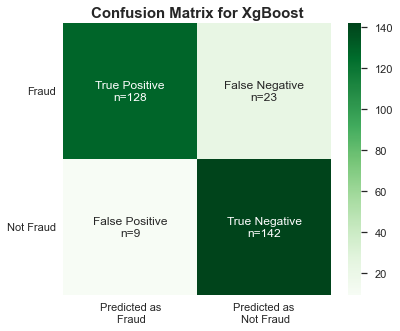

In [58]:
ylabels=['Fraud','Not Fraud']
xlabels=['Predicted as\n Fraud','Predicted as\n Not Fraud']
fix, ax = plt.subplots(figsize=(6,5))
sns.set()
ax = sns.heatmap(XG_metrics[2], annot=matrix_labels, 
            xticklabels = xlabels, yticklabels = ylabels, 
            fmt='', cmap='Greens')
ax.set_title('Confusion Matrix for XgBoost', fontsize=15,  fontweight='bold')
ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=11, ha= 'center', rotation=0 )
ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=11, va="center", rotation=0)
 
plt.savefig('cf_matrix')


In [59]:
count_val

['n=128', 'n=23', 'n=9', 'n=142']

### ADA Boost

In [159]:
from sklearn.ensemble import AdaBoostClassifier
ab = AdaBoostClassifier()

ab_values = {'n_estimators':[50,100,150,200,250,300,350,400,450,500,550,600],
            'learning_rate':[0.05,0.1,0.3,0.5]
              }


    
rs_ab3 = RandomizedSearchCV(ab, ab_values, cv=10, n_jobs = -1, random_state=42)
rs_ab3.fit(X_train, y_train)
print(rs_ab3.best_params_)

{'n_estimators': 150, 'learning_rate': 0.3}


In [160]:
ad_clf = rs_ab3.best_estimator_

#y_pred = rand_clf.predict(X_test)
label_prediction(ad_clf, X_test )
ad_metrics = calculate_metrics(ad_clf, X_train, X_test, y_test, y_train)
ad_statistics = model_statictics(ad_metrics[2])
print_metrics(ad_metrics, 'XG Boost Classifier', ad_statistics)

Training Accuracy of XG Boost Classifier is 89.701%
Testing Accuracy of XG Boost Classifier is 88.742%
Confusion matrix of XG Boost Classifier is
 [[133  18]
 [ 16 135]]


############################################################
Classification report for XG Boost Classifier is 
               precision    recall  f1-score   support

           0       0.89      0.88      0.89       151
           1       0.88      0.89      0.89       151

    accuracy                           0.89       302
   macro avg       0.89      0.89      0.89       302
weighted avg       0.89      0.89      0.89       302

############################################################


Cohen Kappa Score for XG Boost Classifier is [0.7748344370860927]
Sensitivity for XG Boost Classifier is 0.8807947019867549
Specificity for XG Boost Classifier is 0.8940397350993378
Mathew's Coefficient for XG Boost Classifier is 0.7749024109819237


In [161]:
### ROC, AUC Curve

In [60]:

y_pred_svm = svc_tuned.decision_function(X_test)
svm_fpr,svm_tpr, svm_threshold = roc_curve(y_test, y_pred_svm)
auc_svm = auc(svm_fpr, svm_tpr)


In [61]:

svm_precision, svm_recall, _ = precision_recall_curve(y_test, y_pred_svm)

In [62]:
#baseline for this is fraction of positive cases in dataset
y_test.value_counts()
baseline_prc = y_test.value_counts()[1]/ (y_test.value_counts()[0]+y_test.value_counts()[1])

### Precision Recall Curve 

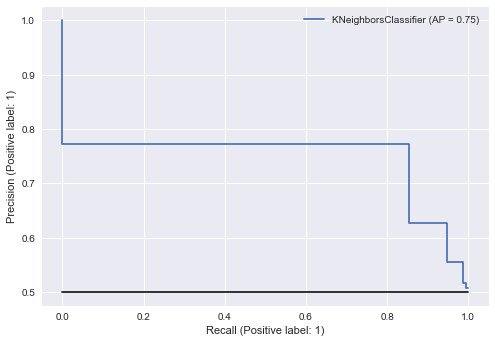

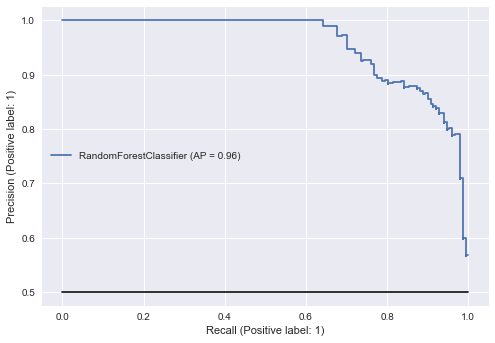

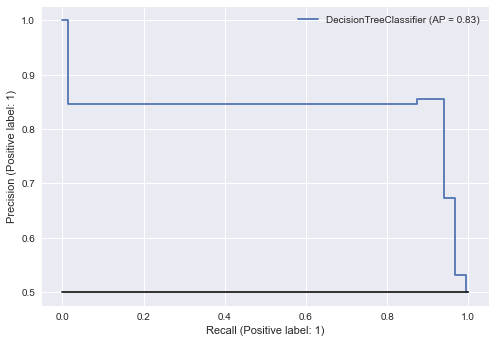

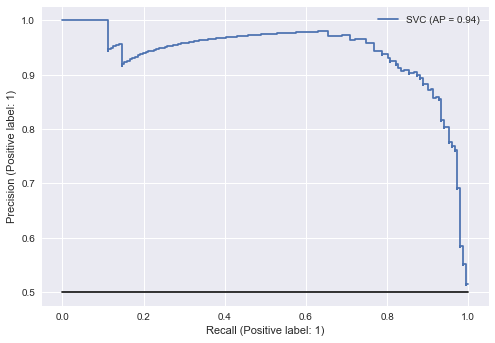

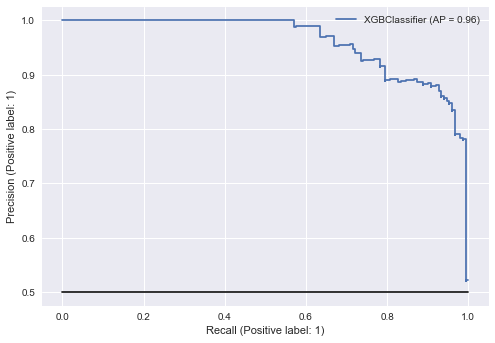

In [63]:

for i in [knn_tuned,rand_tuned,dtc_tuned,svc_tuned,Xg_clf]:
    plt.style.use('seaborn')
    plot_precision_recall_curve(i, X_test, y_test)
    plt.plot([0,1],[baseline_prc,baseline_prc],c='k')
    plt.legend(loc="best")
    plt.show()
#plot_precision_recall_curve(rand_tuned, X_test, y_test)
#plot_precision_recall_curve(knn_tuned, X_test, y_test)
#plot_precision_recall_curve(knn_tuned, X_test, y_test)
#plt.plot([0,1],[baseline_prc,baseline_prc],c='k')
#plt.legend(loc="best")
#plt.show()
#baseline for this is fraction of positive cases in dataset

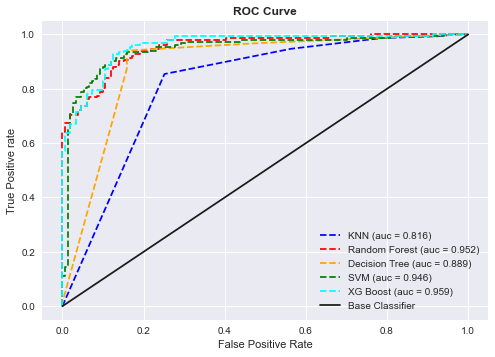

In [64]:
plt.style.use('seaborn')
FPR_knn, TPR_knn, Threshold_knn, model_auc_score_knn = calculate_roc_auc(knn_tuned,X_test,y_test)
plt.plot(FPR_knn, TPR_knn, linestyle='--',color='blue', label='KNN (auc = %0.3f)'% model_auc_score_knn )
FPR_rand, TPR_rand, Threshold_rand, model_auc_score_rand = calculate_roc_auc(rand_tuned,X_test,y_test)
plt.plot(FPR_rand, TPR_rand, linestyle='--',color='red', label='Random Forest (auc = %0.3f)'% model_auc_score_rand)
FPR_dtc, TPR_dtc, Threshold_dtc, model_auc_score_dtc = calculate_roc_auc(dtc_tuned,X_test,y_test)
plt.plot(FPR_dtc, TPR_dtc, linestyle='--',color='orange', label='Decision Tree (auc = %0.3f)'% model_auc_score_dtc)
plt.plot(svm_fpr, svm_tpr, linestyle='--',color='green',label='SVM (auc = %0.3f)' % auc_svm)
FPR_xg, TPR_xg, Threshold_xg, model_auc_score_xg = calculate_roc_auc(Xg_clf,X_test,y_test)
plt.plot(FPR_xg, TPR_xg, linestyle='--',color='cyan', label='XG Boost (auc = %0.3f)'% model_auc_score_xg)
#Xg_clf
plt.plot([0,1],[0,1],c='k',label='Base Classifier') # baseline classifier
plt.title('ROC Curve',fontweight='bold')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')   
plt.savefig('ROC_final',dpi=300)
plt.show()